In [1]:
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.data_processor.phase_2.prob2.v1 import  Phase2Prob2FeatureProcessor
from src.drift_detector import drift_psi
from collections import Counter

In [4]:
DIR = 'D:/Data/MLOPS_2023/test_phase2_prob2/'
files = os.listdir(DIR)

In [6]:
train_df = pd.read_parquet("D:/Data/MLOPS_2023/data_phase-2/phase-2/prob-2/raw_train.parquet")

In [7]:
dfs = []
for file in files:
    df = pd.read_csv(DIR+file)
    dfs.append(df)

In [27]:
var_count_train = Counter(train_df['feature2'])

In [65]:
drift_dfs = []
for df in dfs:
    var_count_test = Counter(df['feature2'])
    if drift_psi(var_count_train, var_count_test) == 0:
        drift_dfs.append(df)

In [67]:
for df in drift_dfs:
    var_count_test = Counter(df['feature2'])
    print(var_count_test)

Counter({'tcp': 619, 'udp': 443, 'unas': 84, 'ospf': 21, 'arp': 15, 'qnx': 5, 'sctp': 5, 'mobile': 4, 'hmp': 3, 'idpr': 3, 'sun-nd': 2, 'gmtp': 2, 'il': 2, 'i-nlsp': 2, 'pup': 2, 'zero': 2, 'tlsp': 2, 'ip': 2, 'ipcomp': 2, 'tp++': 1, 'leaf-1': 1, 'wb-mon': 1, 'iso-ip': 1, 'ipx-n-ip': 1, 'ifmp': 1, 'iplt': 1, 'isis': 1, 'fc': 1, 'encap': 1, 'ipv6': 1, 'mfe-nsp': 1, 'vines': 1, 'etherip': 1, 'uti': 1, 'argus': 1, 'rsvp': 1, 'prm': 1, 'ttp': 1, 'kryptolan': 1, 'a/n': 1, 'sep': 1, 'ipcv': 1, 'merit-inp': 1, 'chaos': 1, 'fire': 1, 'leaf-2': 1, 'ggp': 1, 'xns-idp': 1, 'pipe': 1, 'trunk-1': 1, 'scps': 1, 'br-sat-mon': 1, 'ipv6-opts': 1, 'igp': 1, 'bna': 1, 'ax.25': 1, 'dcn': 1, 'egp': 1, 'mhrp': 1, 'pnni': 1, 'dgp': 1, 'any': 1, 'idrp': 1, 'ipv6-no': 1, 'micp': 1, 'cbt': 1, 'cpnx': 1})
Counter({'tcp': 452, 'udp': 398, 'unas': 52, 'arp': 20, 'ospf': 12, 'sctp': 10, 'sun-nd': 4, 'rsvp': 3, 'netblt': 2, 'sdrp': 2, 'idpr': 2, 'mobile': 2, 'sep': 2, 'qnx': 2, 'rvd': 2, 'ggp': 2, 'secure-vmtp': 2, 

In [68]:
var_count_train

Counter({'tcp': 29587,
         'udp': 22189,
         'unas': 3754,
         'arp': 888,
         'ospf': 802,
         'sctp': 318,
         'any': 92,
         'gre': 74,
         'ipv6': 72,
         'pim': 64,
         'swipe': 61,
         'mobile': 60,
         'sep': 59,
         'rsvp': 56,
         'sun-nd': 54,
         'mtp': 44,
         'tcf': 44,
         'emcon': 43,
         'pipe': 43,
         'ip': 41,
         'sat-expak': 41,
         'narp': 41,
         'visa': 40,
         'trunk-2': 39,
         'sprite-rpc': 39,
         'vines': 39,
         'ifmp': 39,
         'iso-ip': 38,
         'ptp': 38,
         'ipcomp': 38,
         'fc': 38,
         'ipv6-opts': 38,
         'ipcv': 38,
         'wsn': 37,
         'micp': 37,
         'etherip': 37,
         'stp': 36,
         'cbt': 36,
         'eigrp': 36,
         'pri-enc': 36,
         'qnx': 36,
         'sm': 36,
         'sat-mon': 36,
         'sccopmce': 35,
         'egp': 35,
         'ipv6-route'

In [64]:
train_df['feature2'].value_counts()

feature2
tcp       29587
udp       22189
unas       3754
arp         888
ospf        802
          ...  
idrp         22
isis         22
netblt       22
igmp          5
icmp          3
Name: count, Length: 132, dtype: int64

In [51]:
m_cat = []
for k,v in var_count_train.items():
    if v < 20:
        m_cat.append(k)

In [56]:
'tp++' in var_count_train

True

In [42]:
top_cat = []
for k,v in var_count_train.items():
    if v >= 40:
        top_cat.append(k)

In [52]:
var_count_train

Counter({'tcp': 29587,
         'udp': 22189,
         'unas': 3754,
         'arp': 888,
         'ospf': 802,
         'sctp': 318,
         'any': 92,
         'gre': 74,
         'ipv6': 72,
         'pim': 64,
         'swipe': 61,
         'mobile': 60,
         'sep': 59,
         'rsvp': 56,
         'sun-nd': 54,
         'mtp': 44,
         'tcf': 44,
         'emcon': 43,
         'pipe': 43,
         'ip': 41,
         'sat-expak': 41,
         'narp': 41,
         'visa': 40,
         'trunk-2': 39,
         'sprite-rpc': 39,
         'vines': 39,
         'ifmp': 39,
         'iso-ip': 38,
         'ptp': 38,
         'ipcomp': 38,
         'fc': 38,
         'ipv6-opts': 38,
         'ipcv': 38,
         'wsn': 37,
         'micp': 37,
         'etherip': 37,
         'stp': 36,
         'cbt': 36,
         'eigrp': 36,
         'pri-enc': 36,
         'qnx': 36,
         'sm': 36,
         'sat-mon': 36,
         'sccopmce': 35,
         'egp': 35,
         'ipv6-route'

In [50]:
for cat in m_cat:
    print('='*10+cat)
    print(train_df[train_df['feature2'] == cat]['label'].value_counts())

==========3pc
label
Exploits                 10
Denial of Service         8
Information Gathering     7
Other                     1
Name: count, dtype: int64
==========snp
label
Information Gathering    9
Denial of Service        9
Exploits                 6
Malware                  2
Other                    1
Name: count, dtype: int64
==========wb-expak
label
Exploits                 14
Information Gathering     7
Denial of Service         6
Malware                   1
Name: count, dtype: int64
==========idpr-cmtp
label
Exploits                 14
Denial of Service         9
Information Gathering     4
Malware                   2
Name: count, dtype: int64
==========netblt
label
Denial of Service        11
Exploits                  7
Information Gathering     3
Malware                   1
Name: count, dtype: int64
==========isis
label
Denial of Service        13
Exploits                  5
Information Gathering     2
Malware                   2
Name: count, dtype: int64
==========aes-

In [46]:
m_cat

['igmp', 'icmp']

In [69]:
check_drift = {}
for col in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
            'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
            'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
            'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
            'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
            'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
            'feature32', 'feature33', 'feature34', 'feature35', 'feature36',
            'feature37', 'feature38', 'feature39', 'feature40', 'feature41']:
    if col not in ["feature2",
                   "feature3",
                   "feature4"]:
        print(col)
        mean_ = []
        std_ = []
        max_ = []
        min_ = []
        n_maxs = []
        n_mins = []
        train_max = train_df[col].max()
        train_min = train_df[col].min()
        for df in drift_dfs:
            mean_.append(df[col].mean())
            std_.append(df[col].std())
            max_.append(df[col].max())
            min_.append(df[col].min())
            n_maxs.append(df[df[col]>train_max].shape[0])
            n_mins.append(df[df[col]<train_min].shape[0])
        check_drift[col] = pd.DataFrame({'mean_':mean_, 'std_':std_, 'max_': max_, 'min_':min_, 'n_max':n_maxs, 'n_min':n_mins})

feature1
feature5
feature6
feature7
feature8
feature9
feature10
feature11
feature12
feature13
feature14
feature15
feature16
feature17
feature18
feature19
feature20
feature21
feature22
feature23
feature24
feature25
feature26
feature27
feature28
feature29
feature30
feature31
feature32
feature33
feature34
feature35
feature36
feature37
feature38
feature39
feature40
feature41


In [70]:
import matplotlib.pyplot as plt

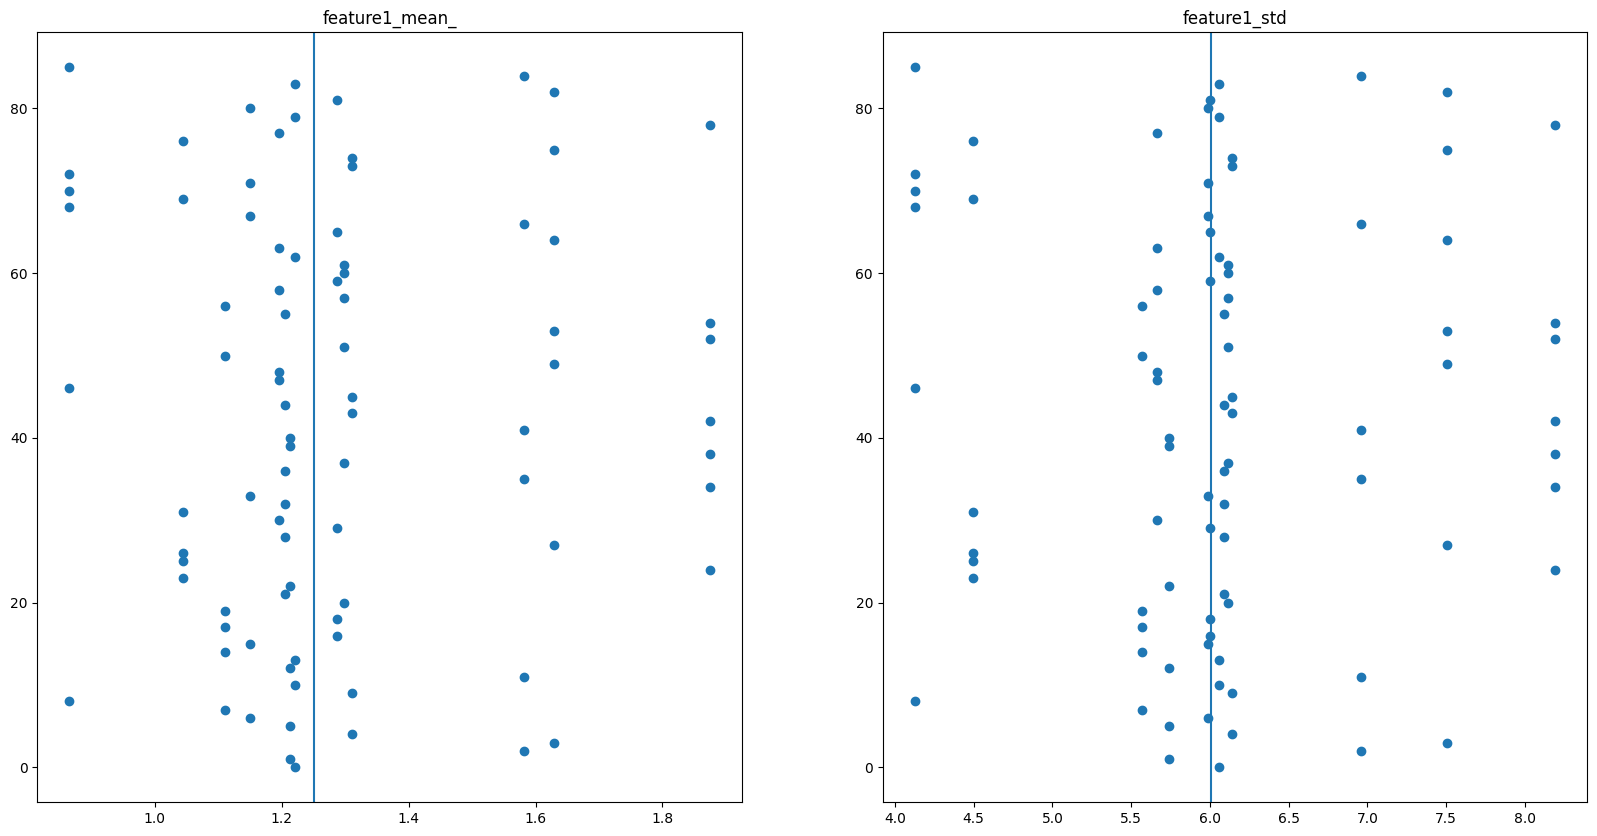

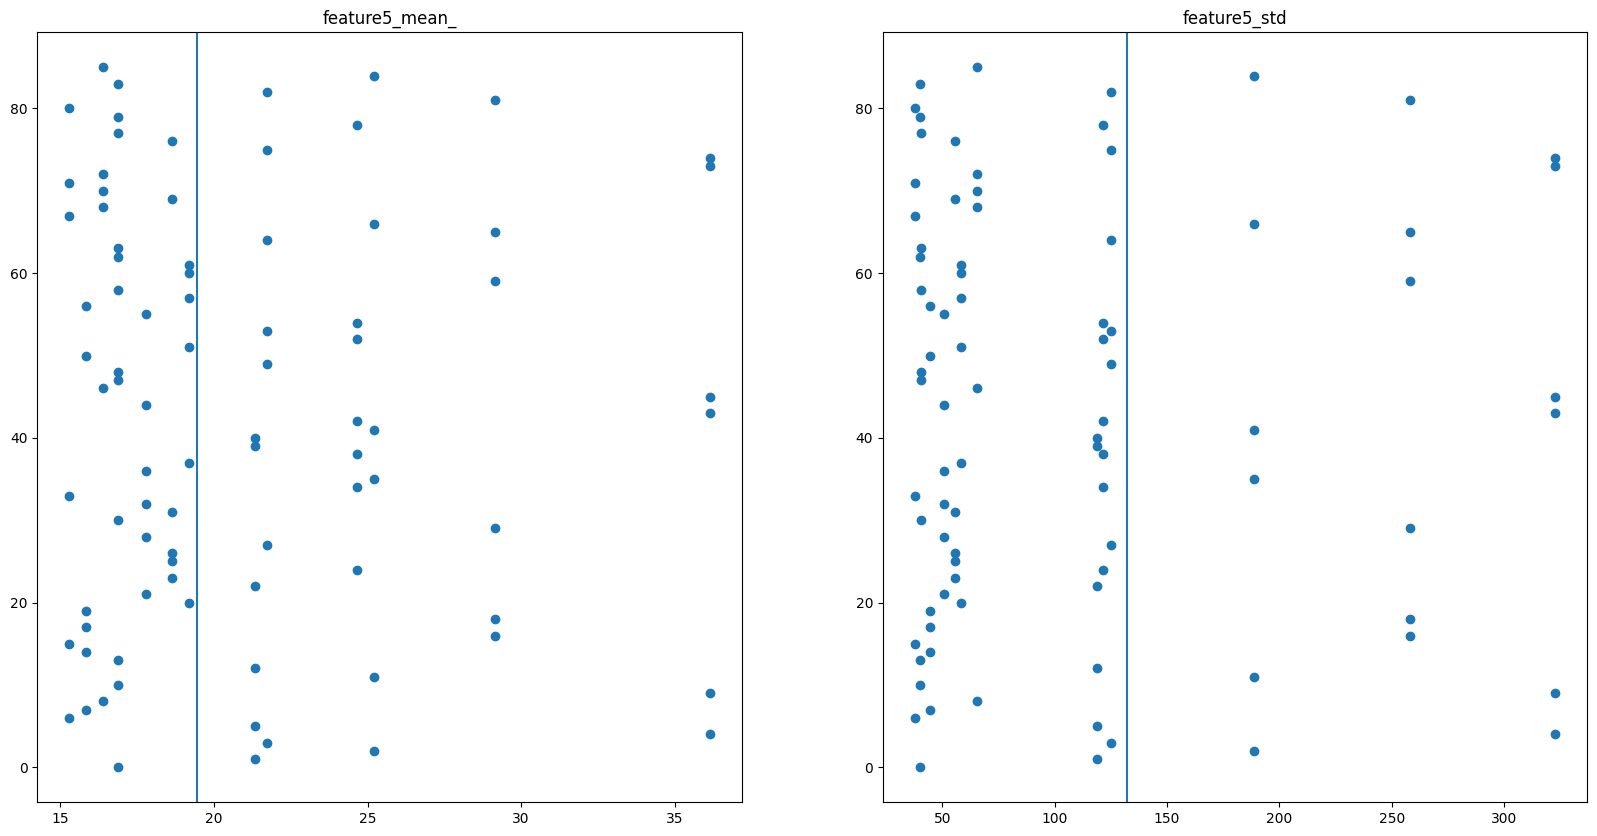

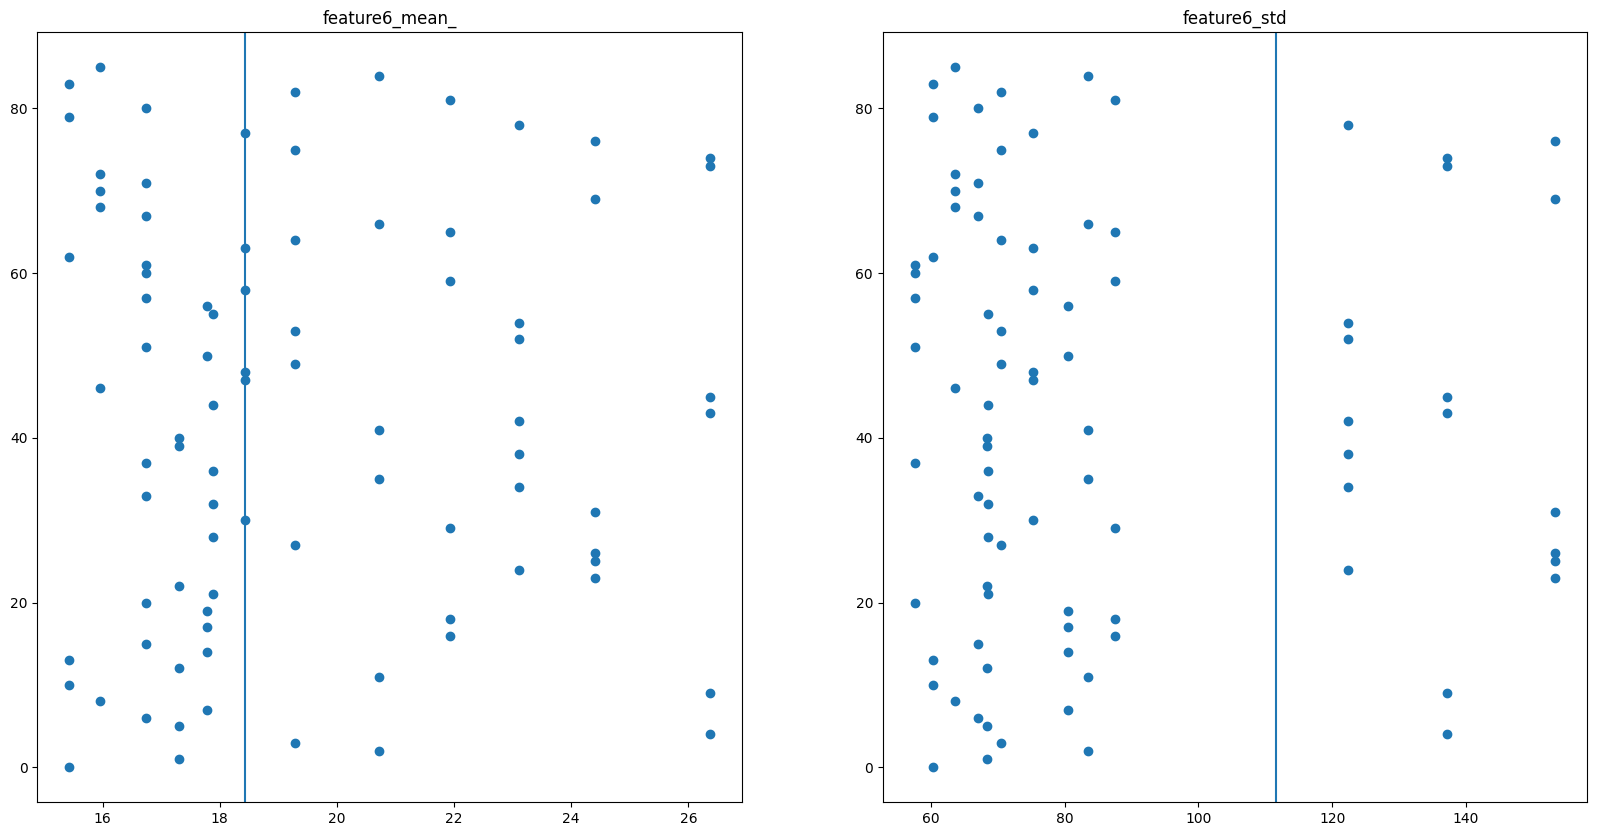

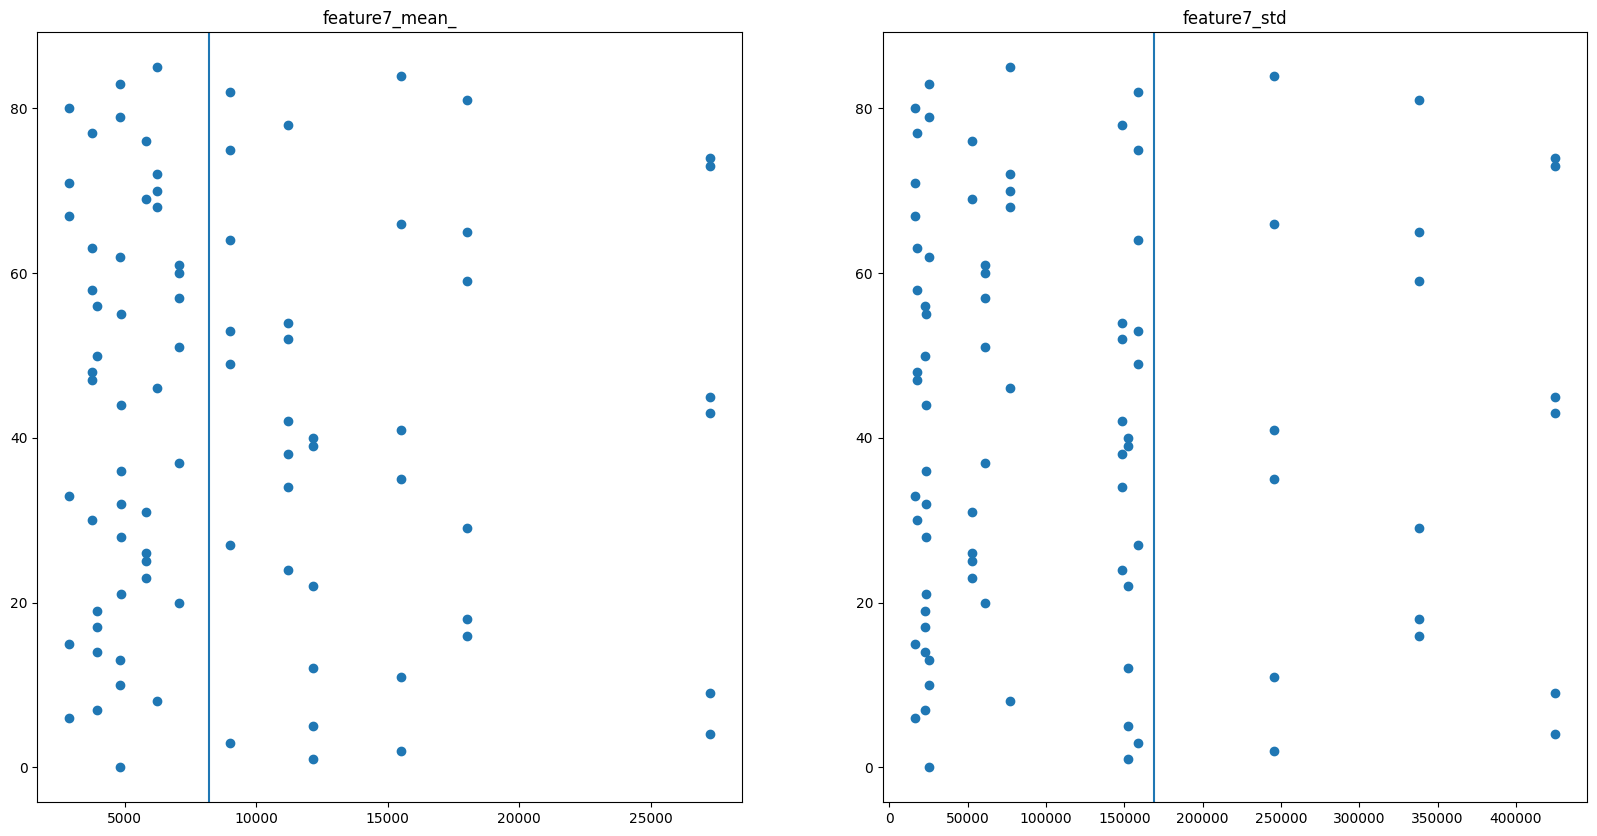

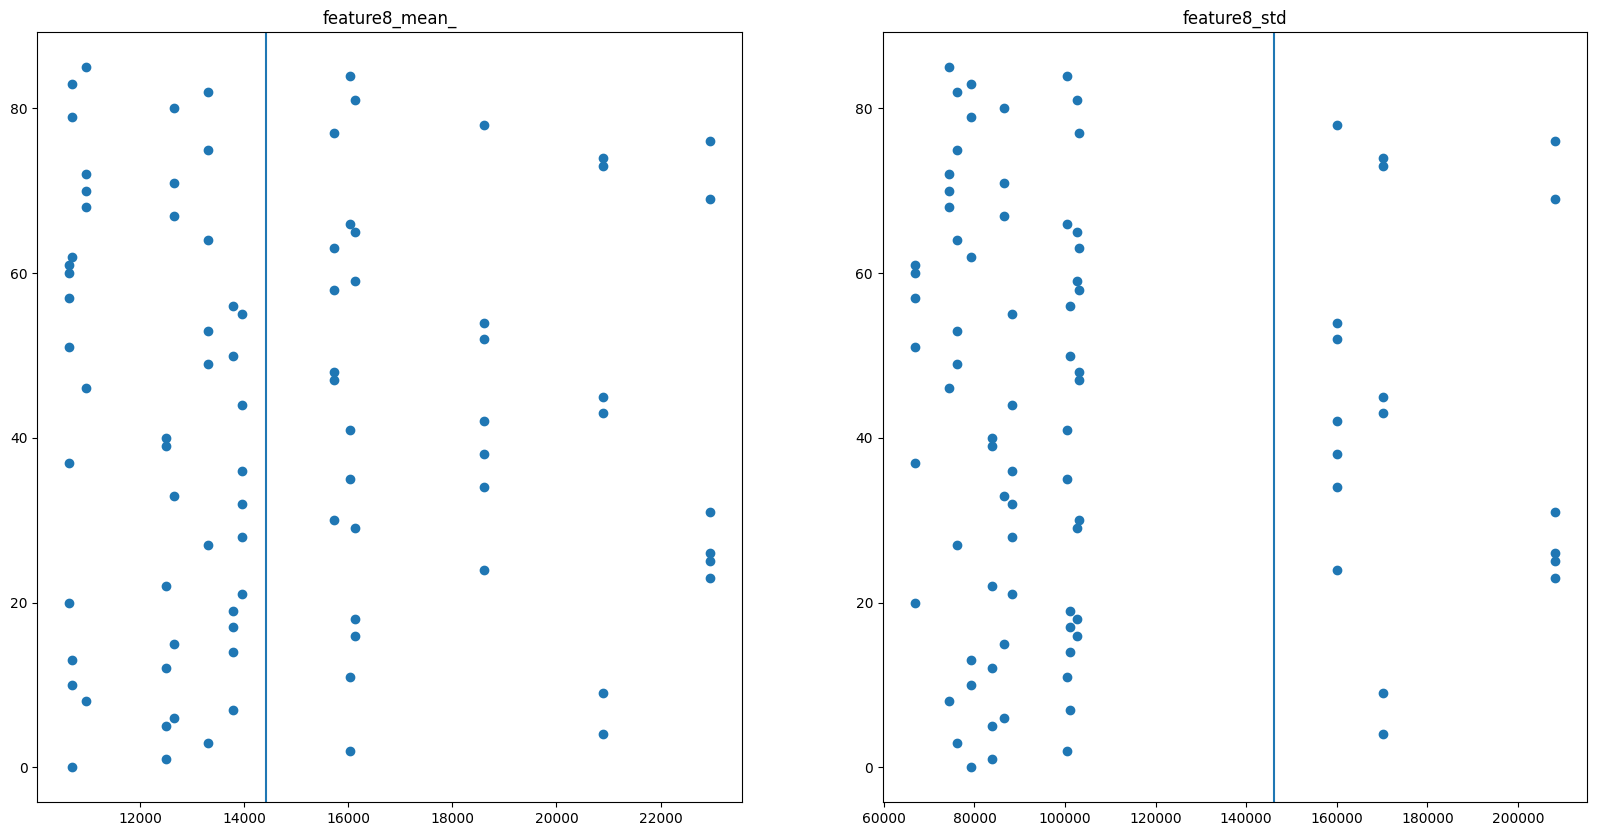

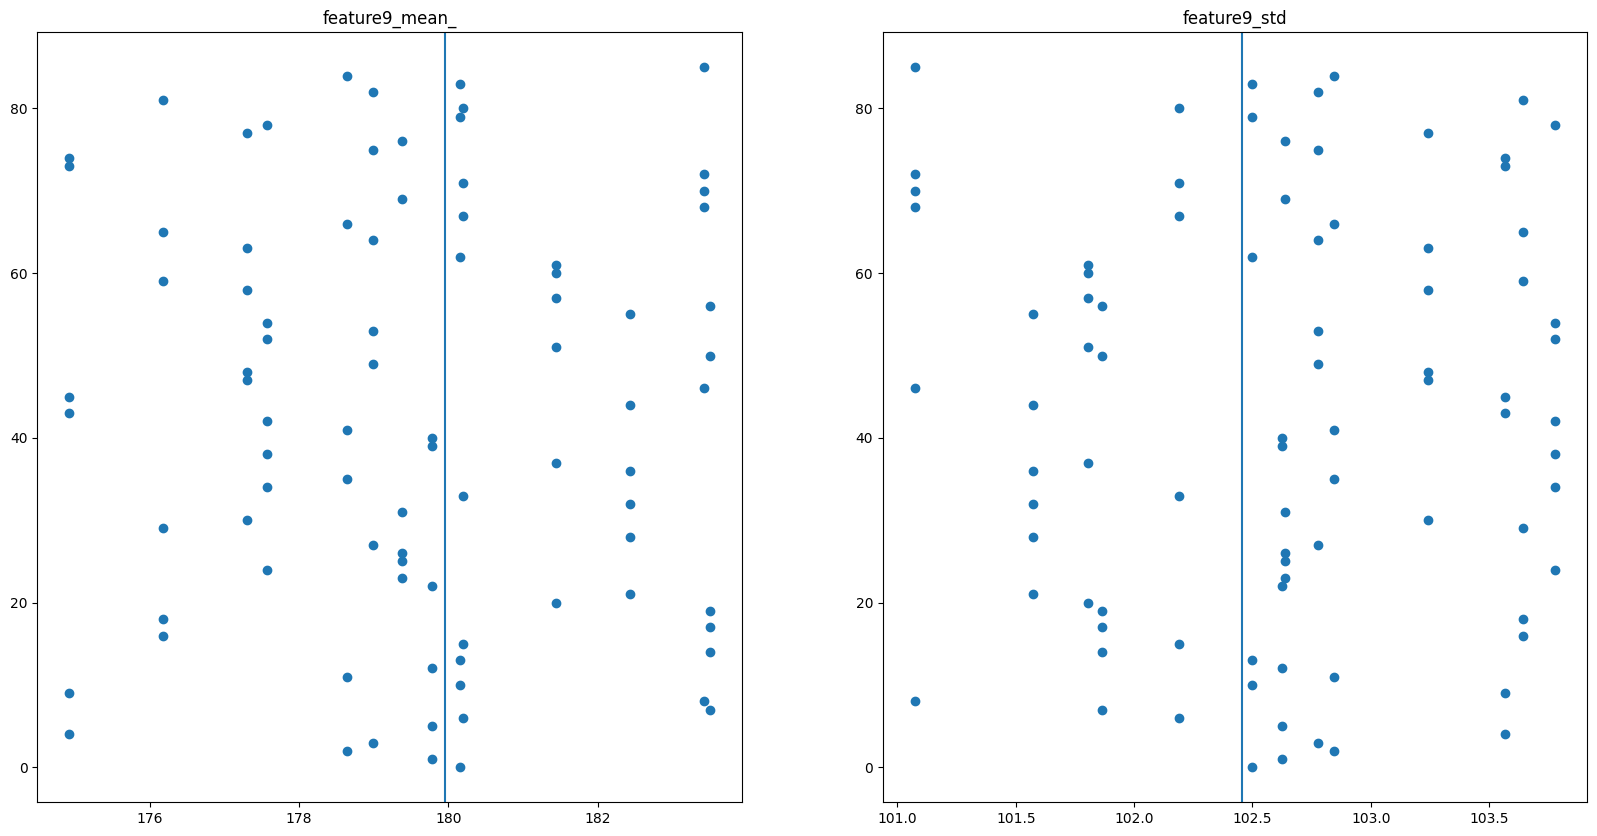

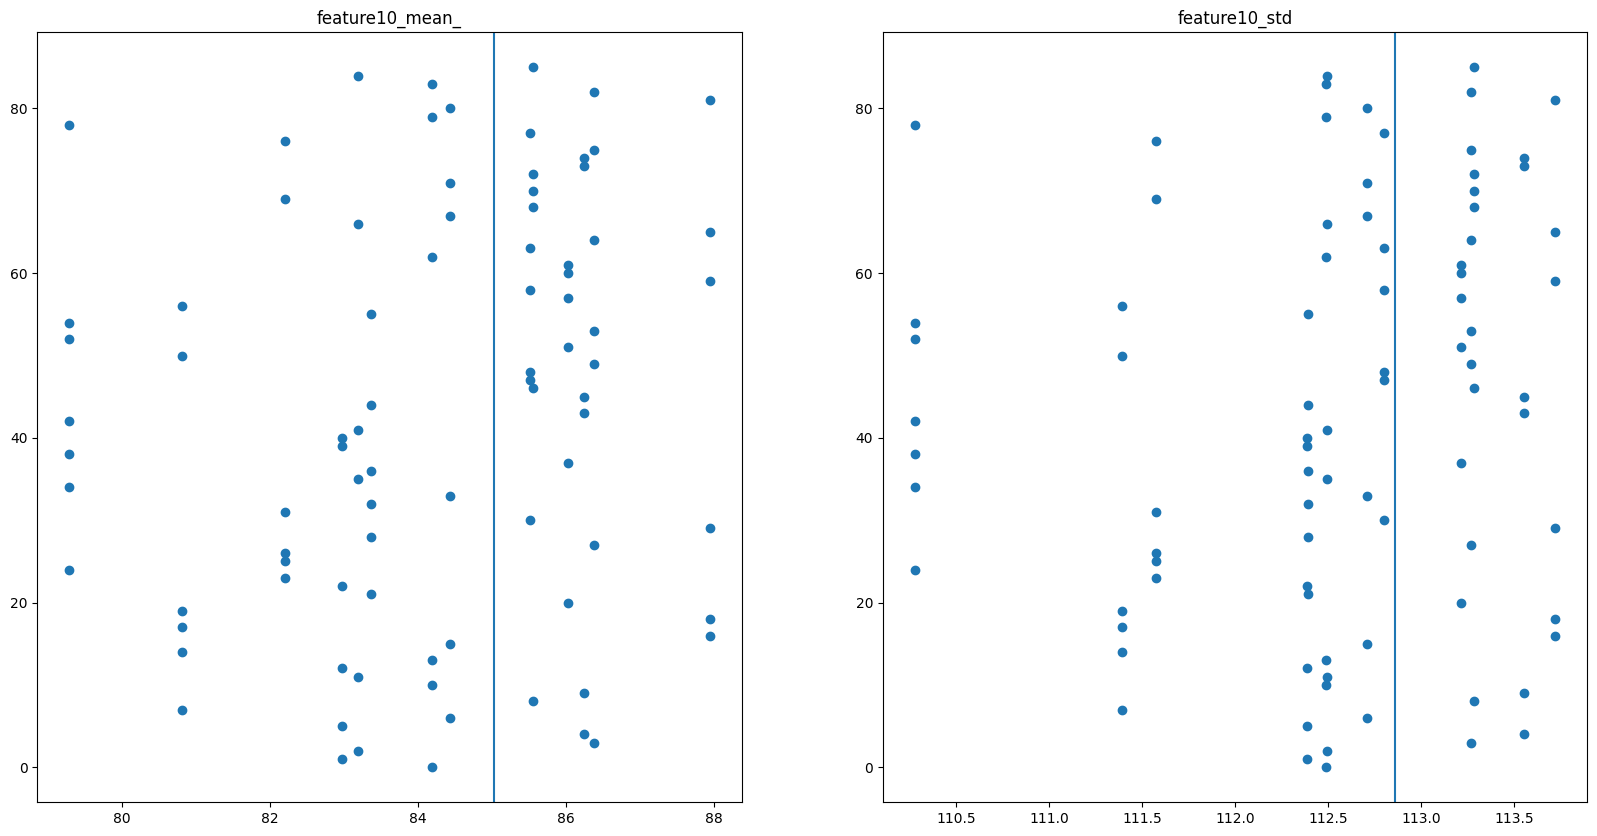

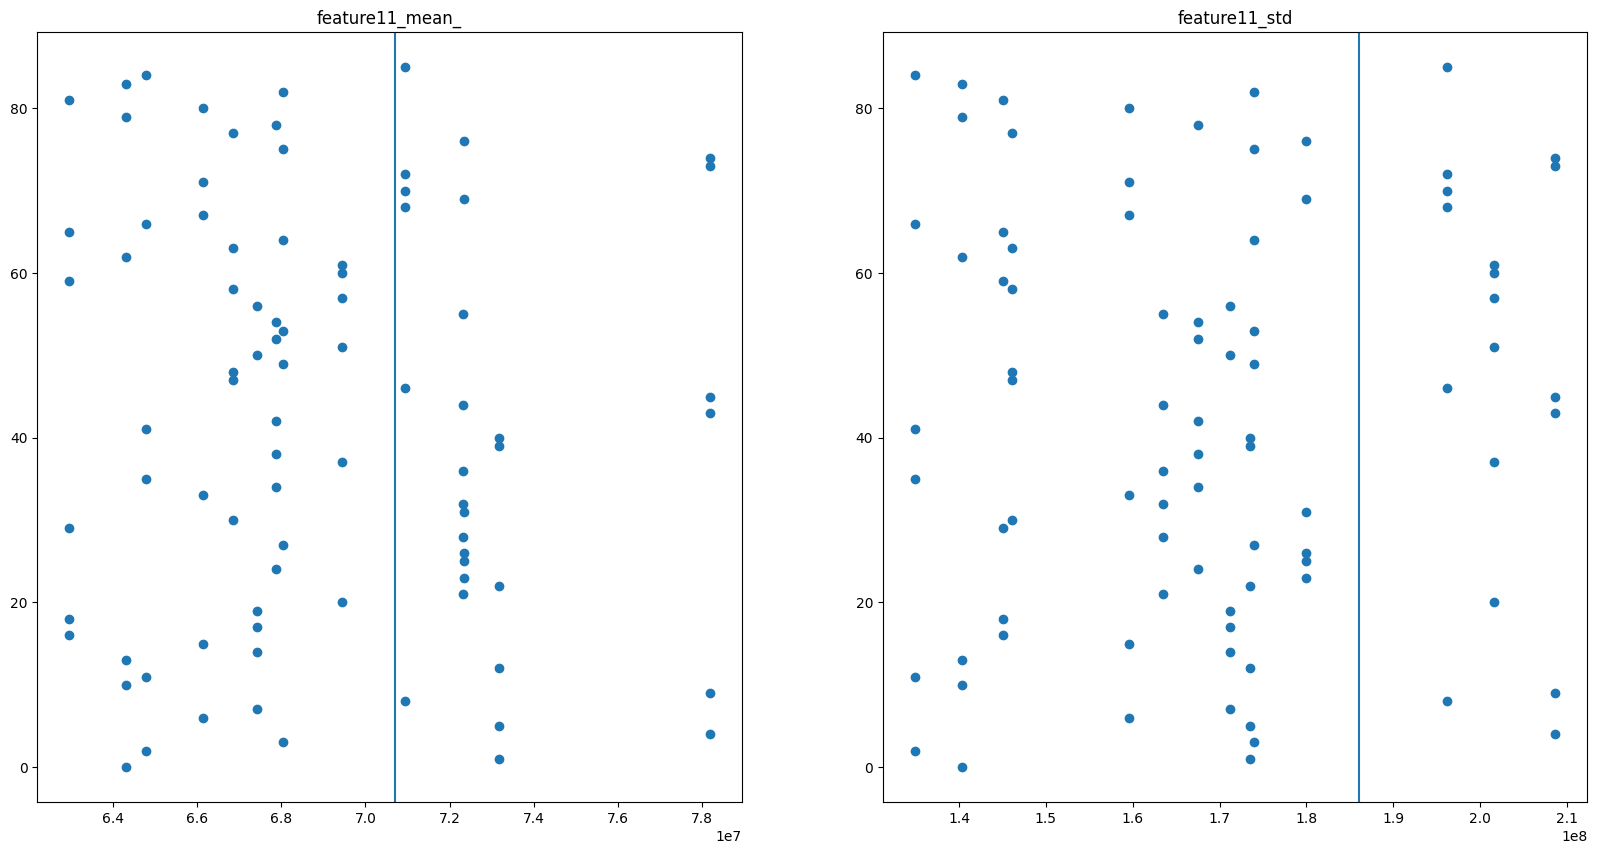

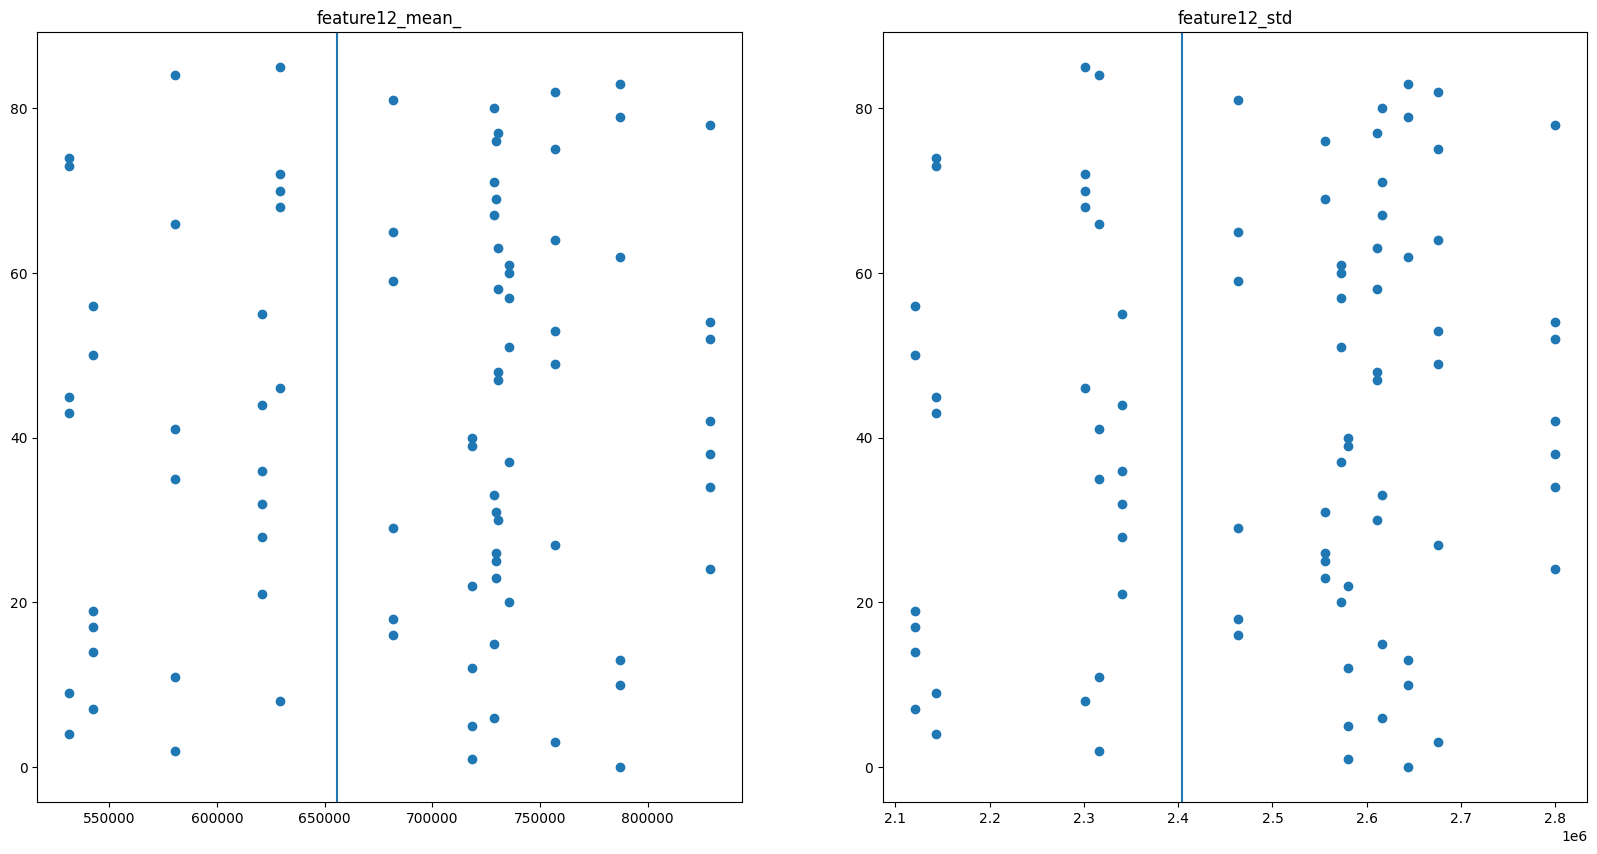

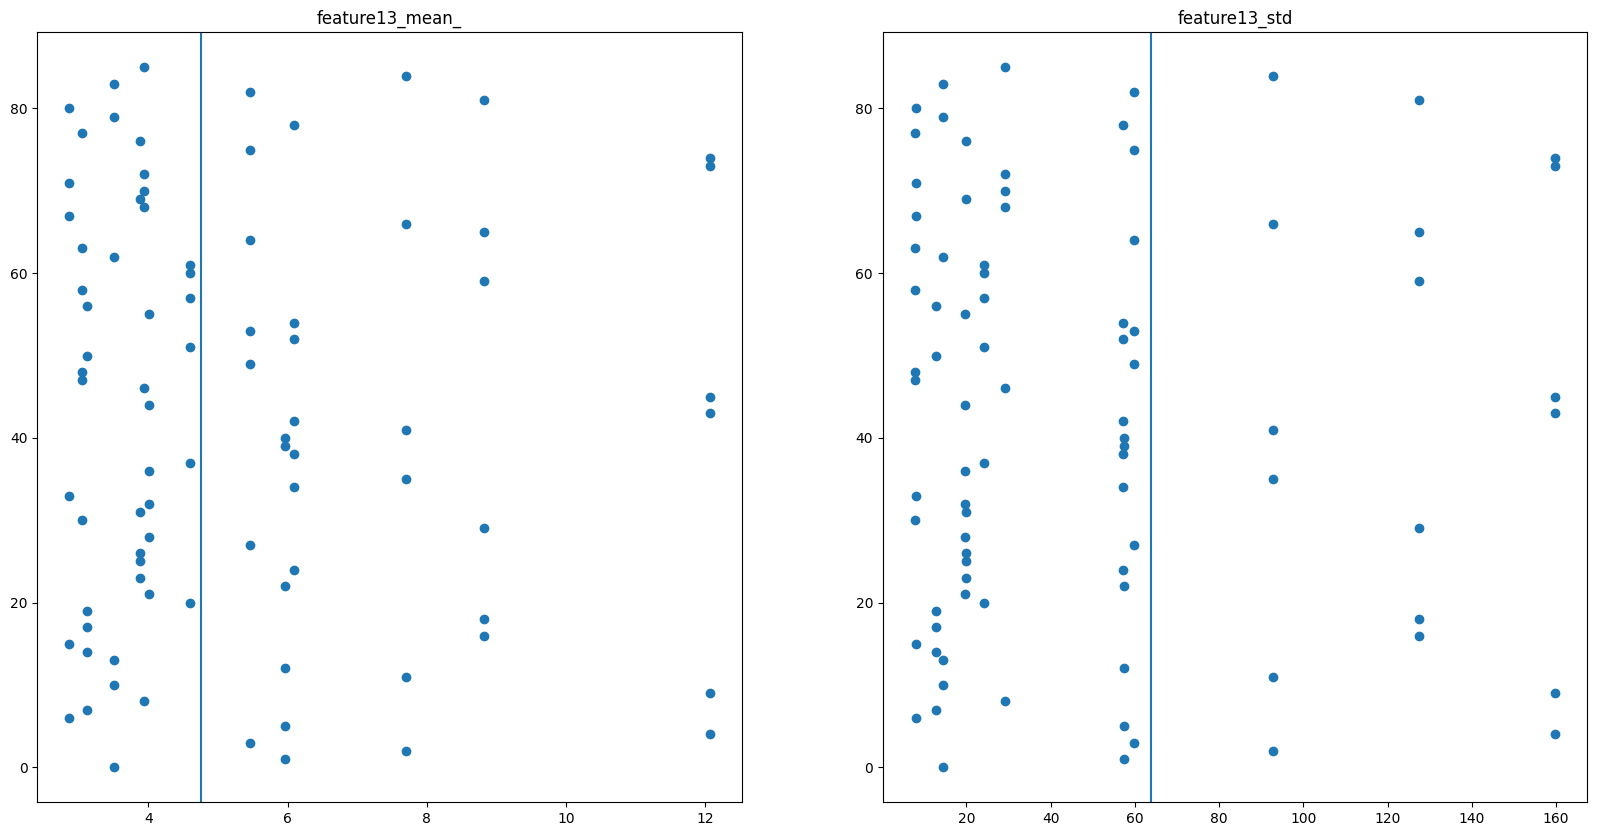

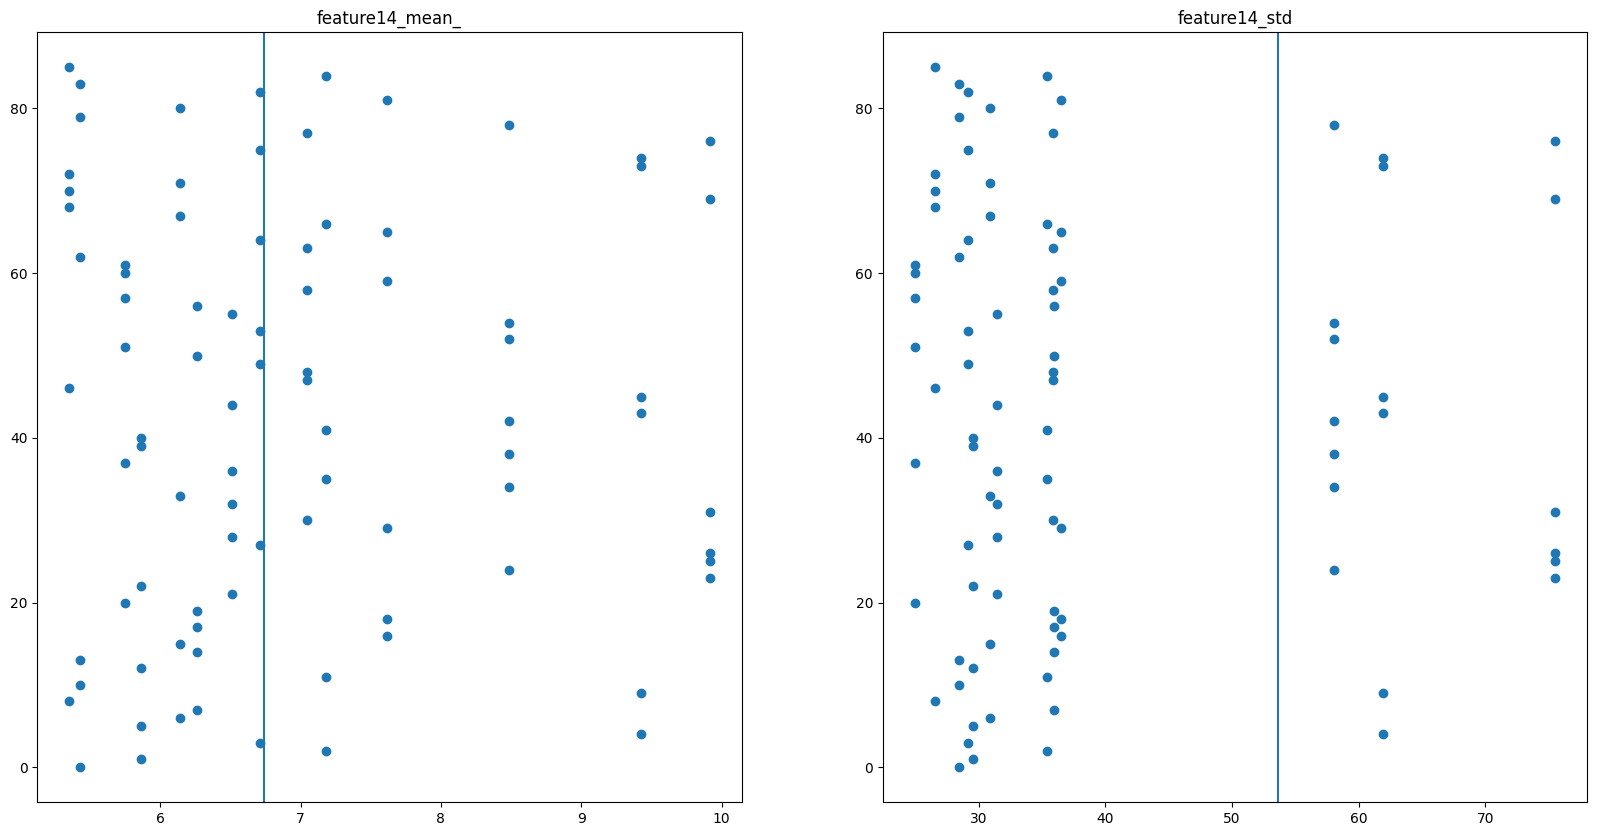

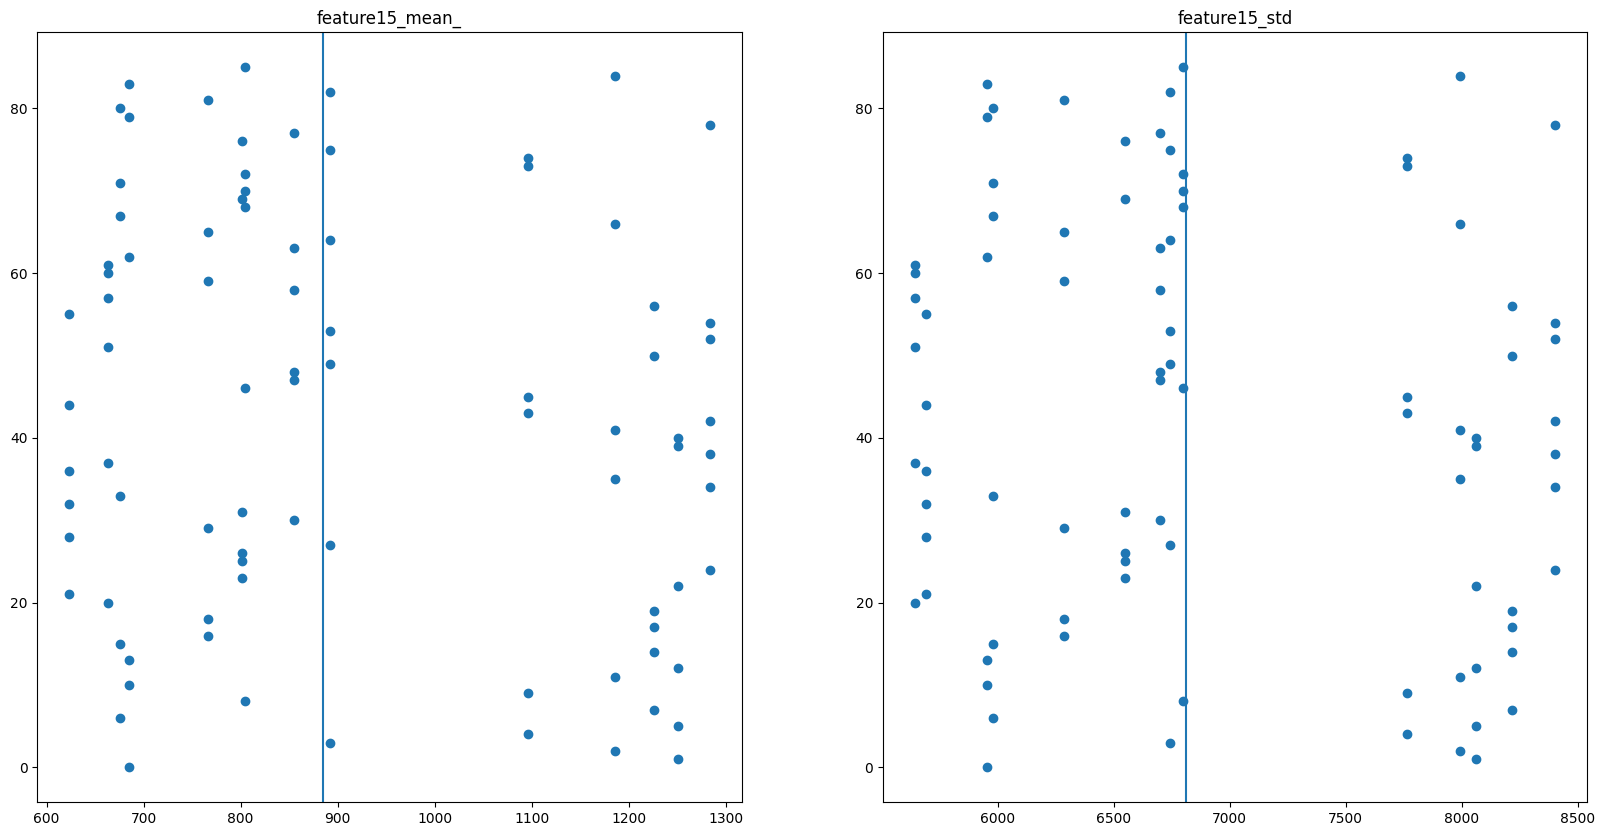

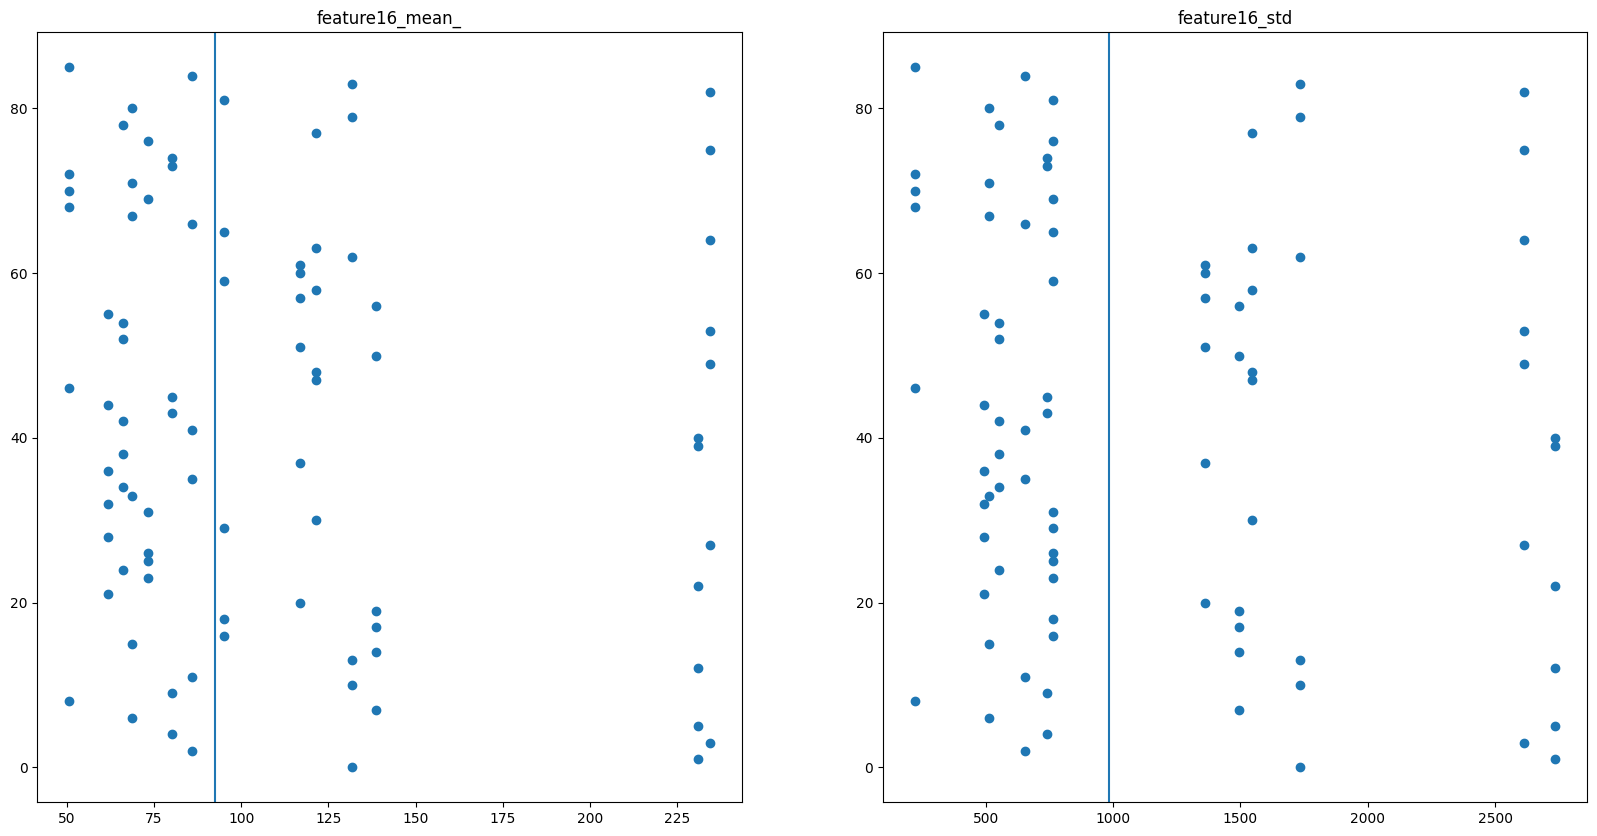

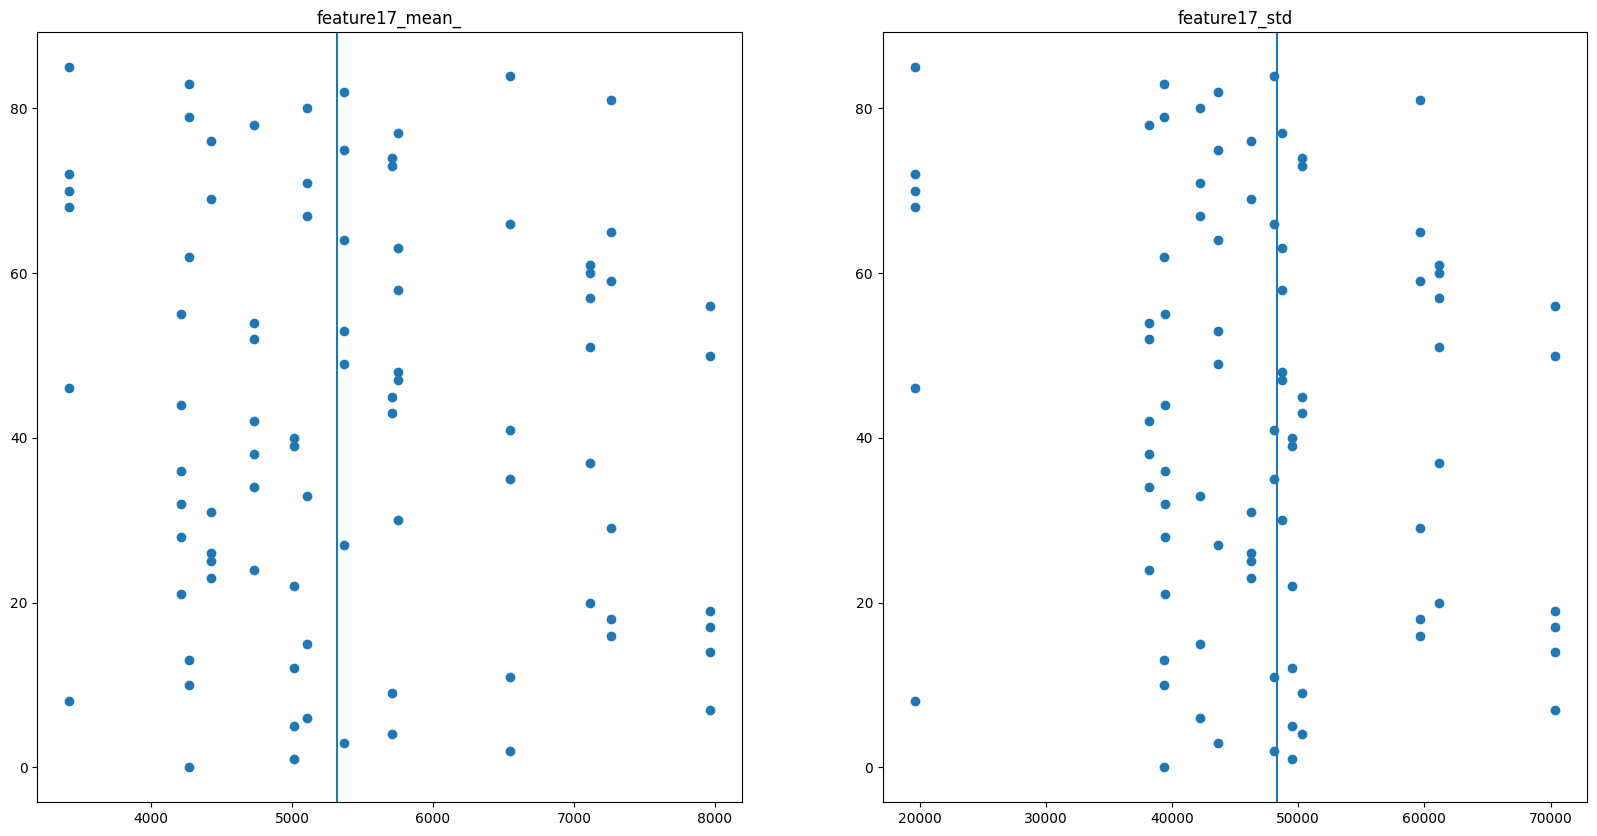

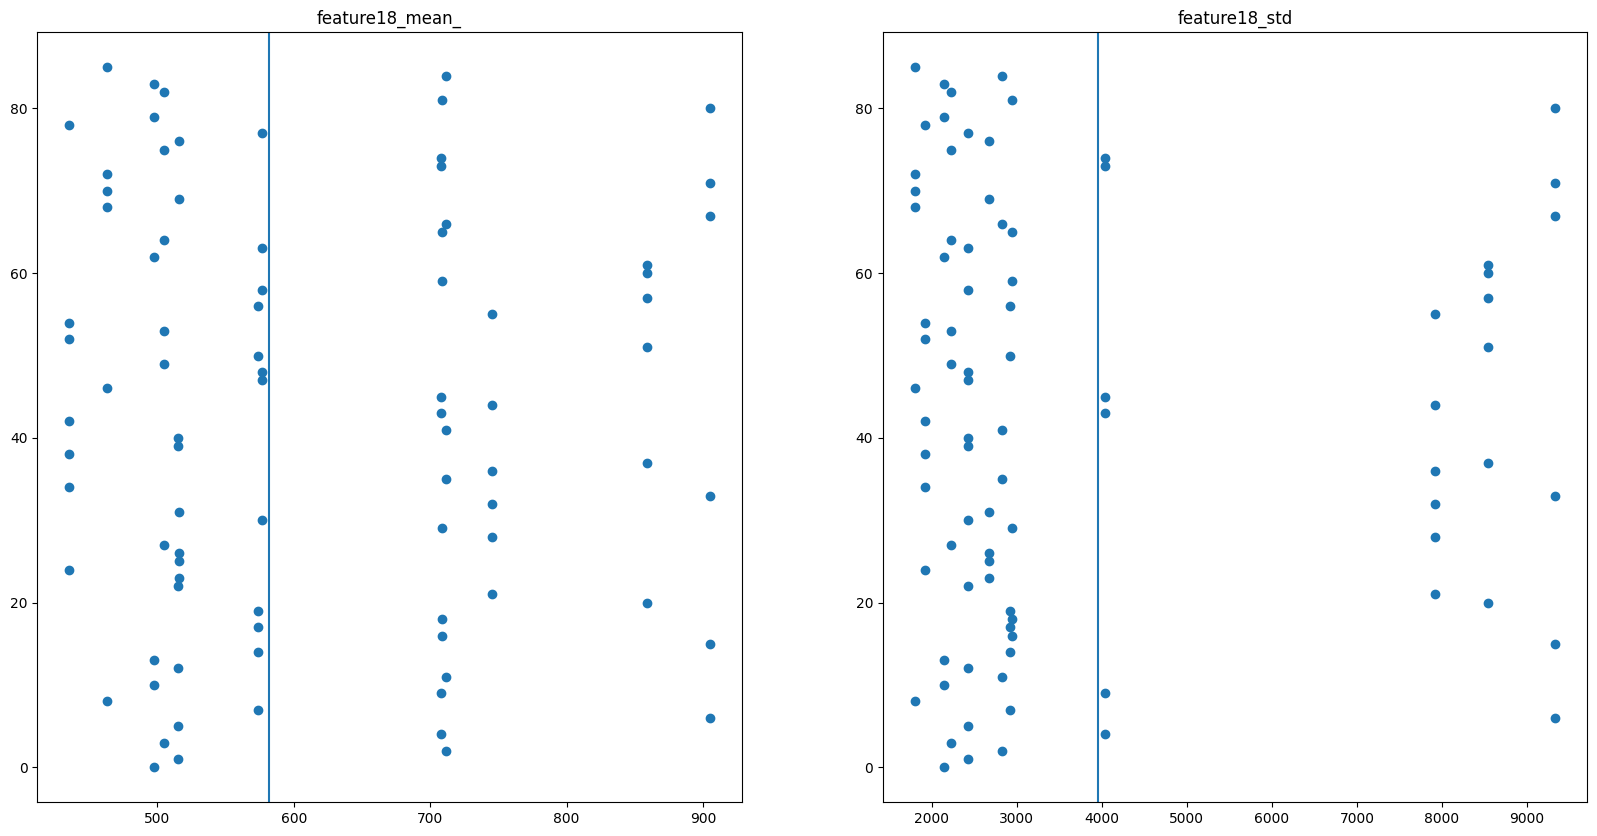

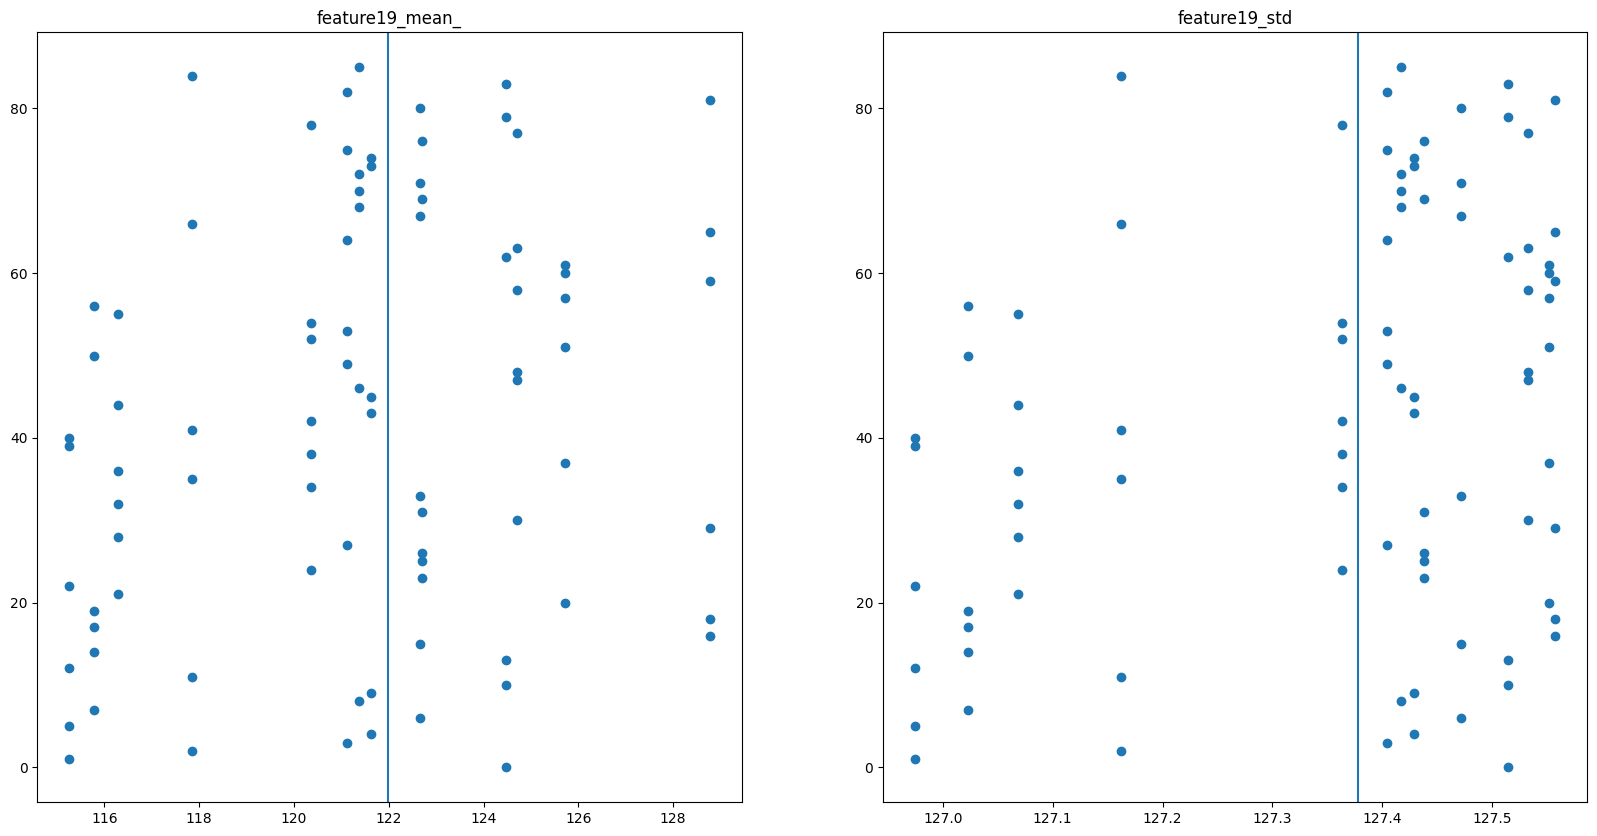

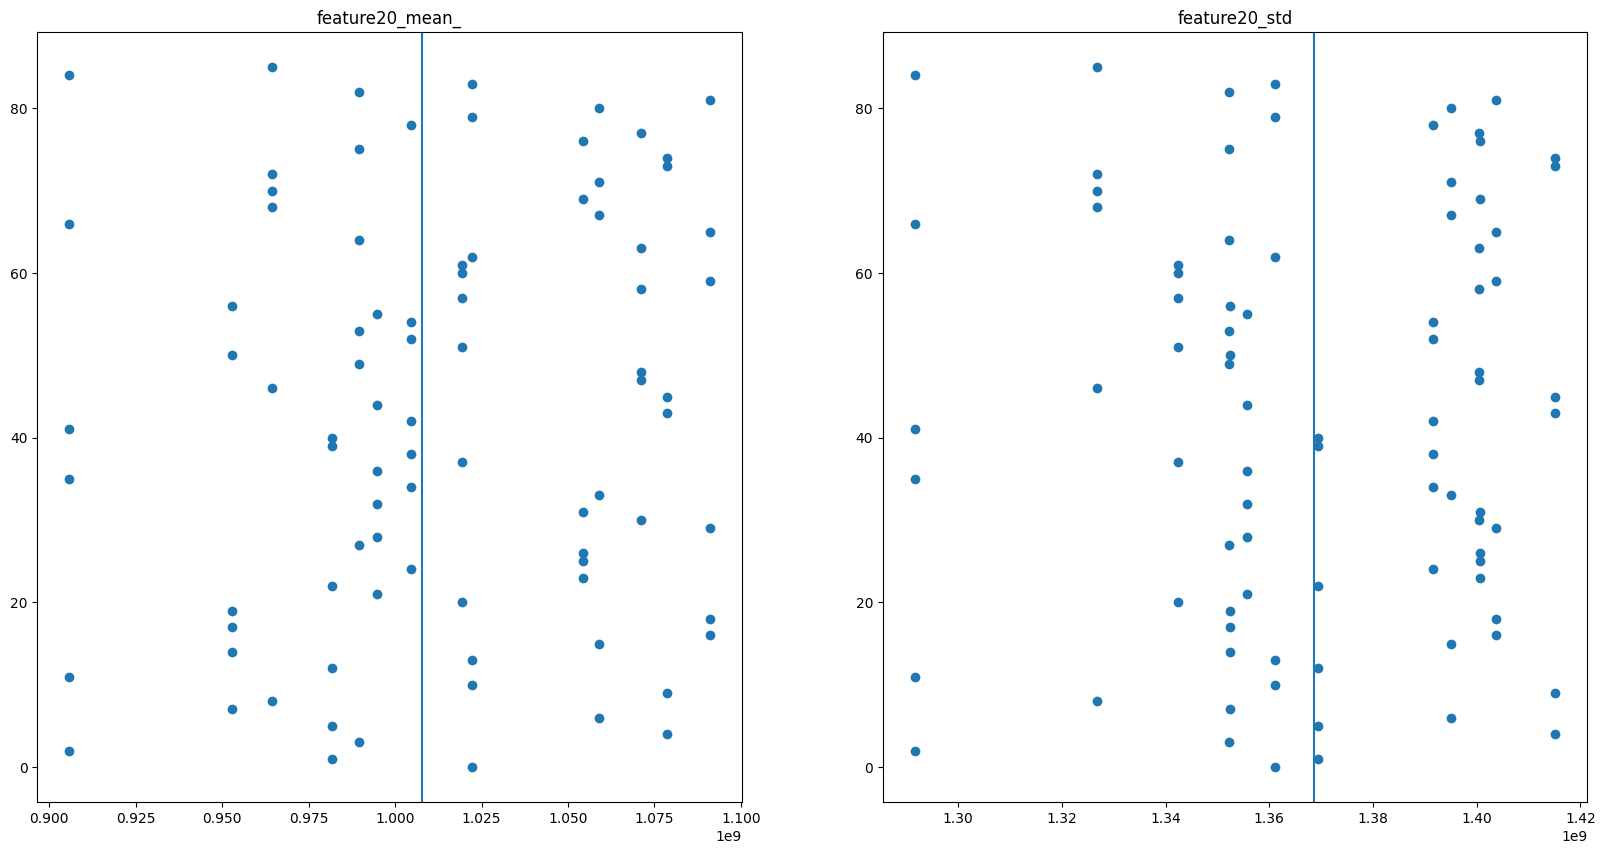

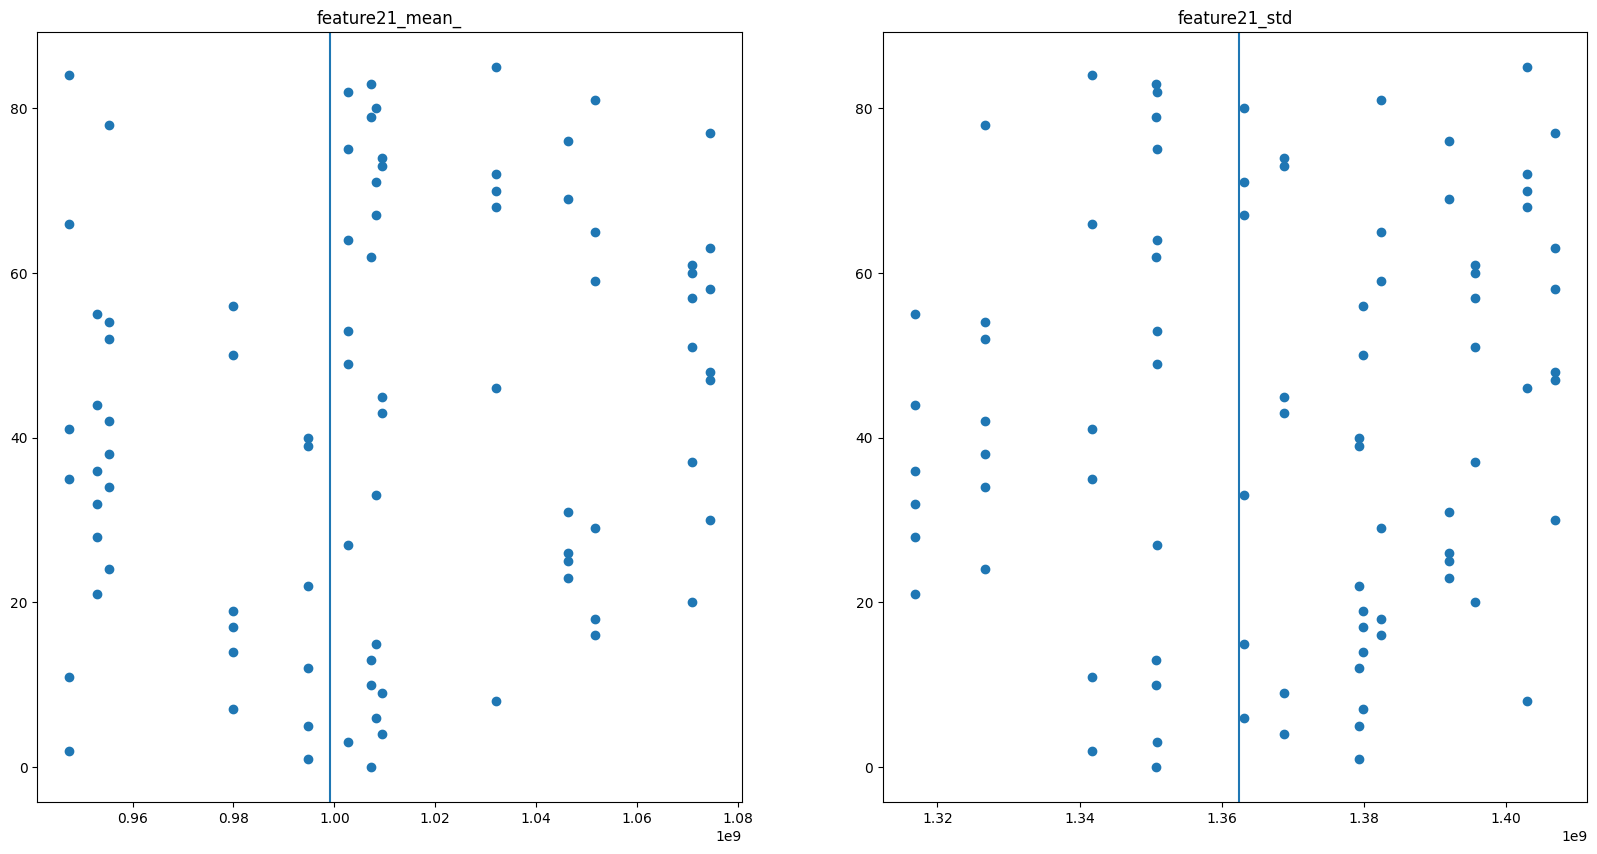

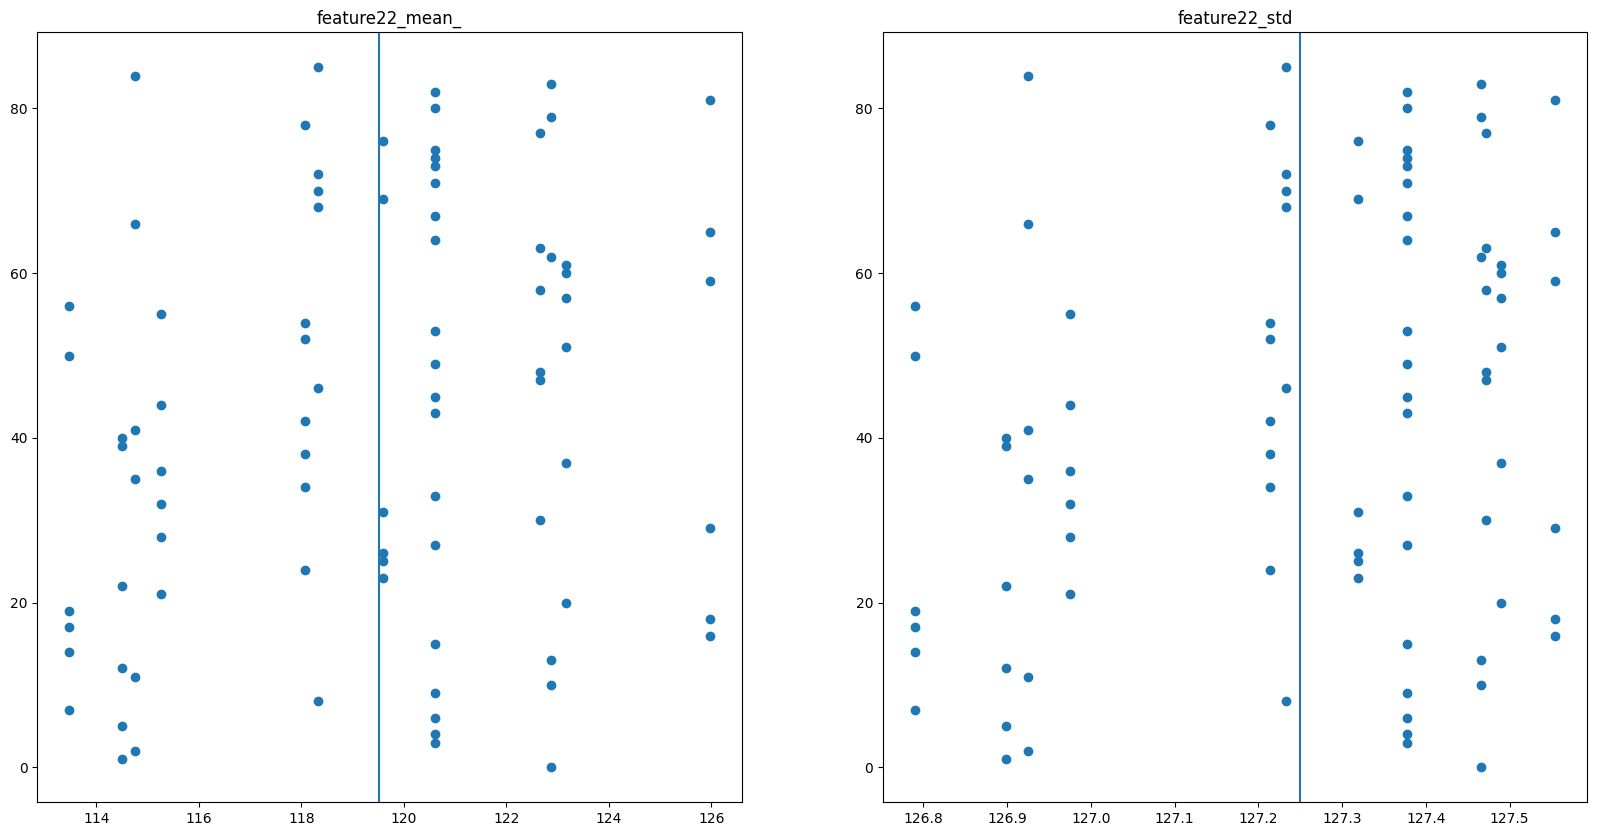

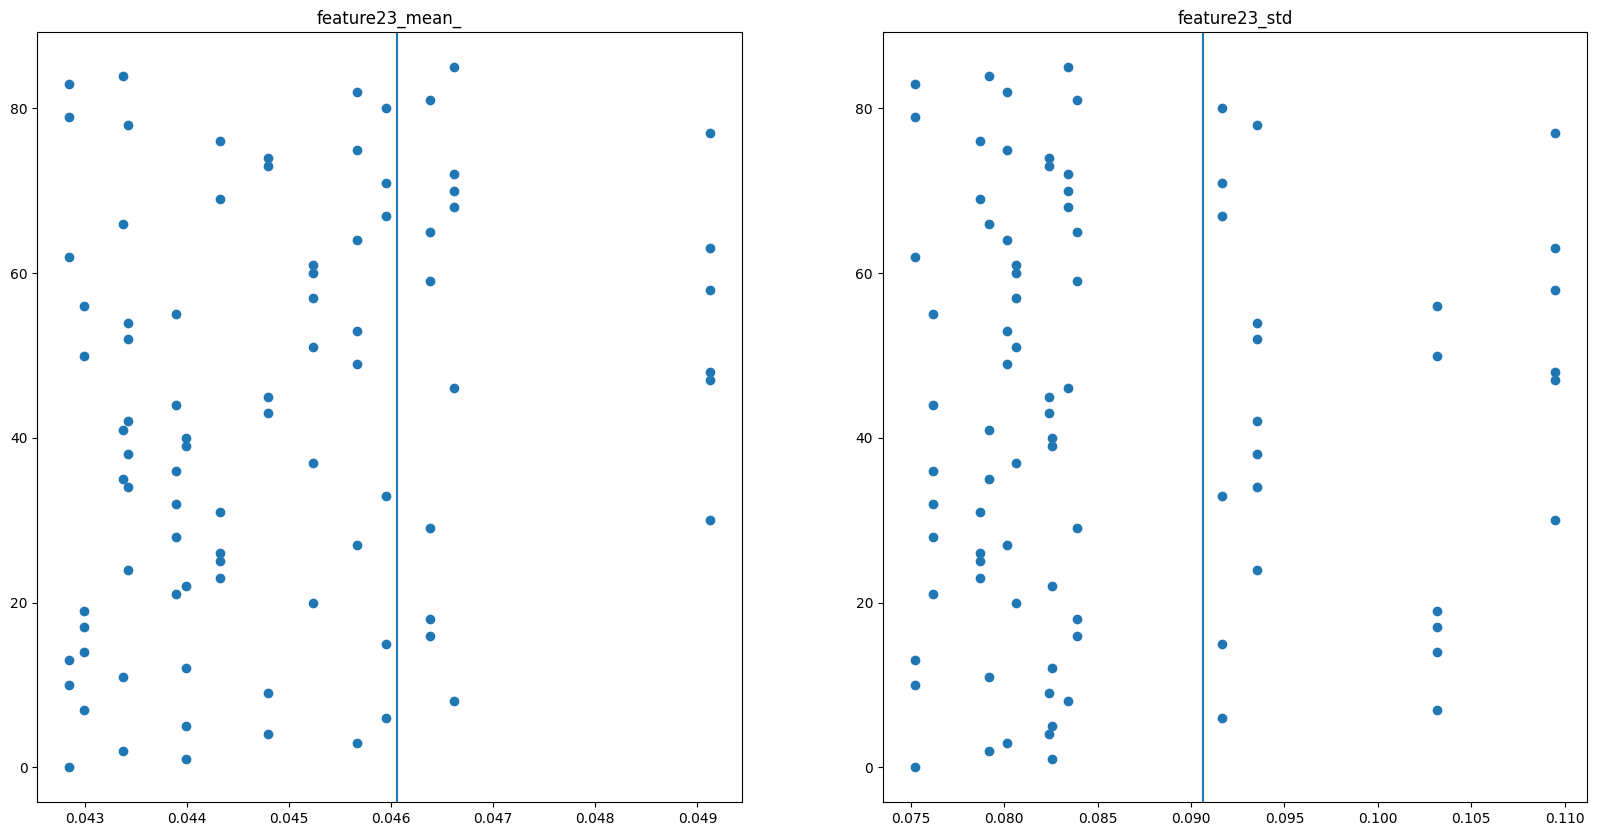

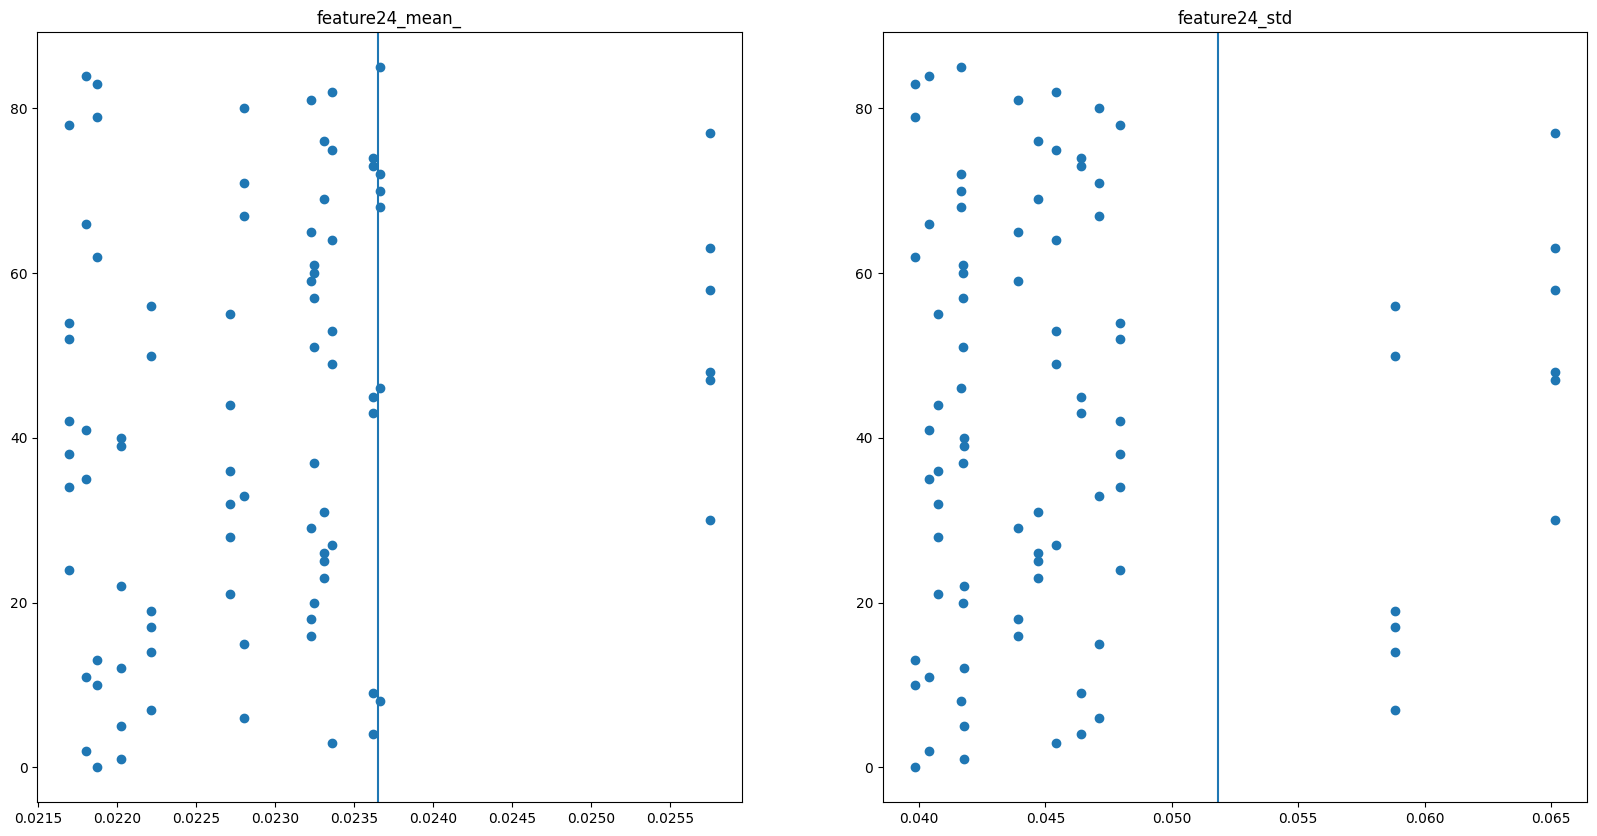

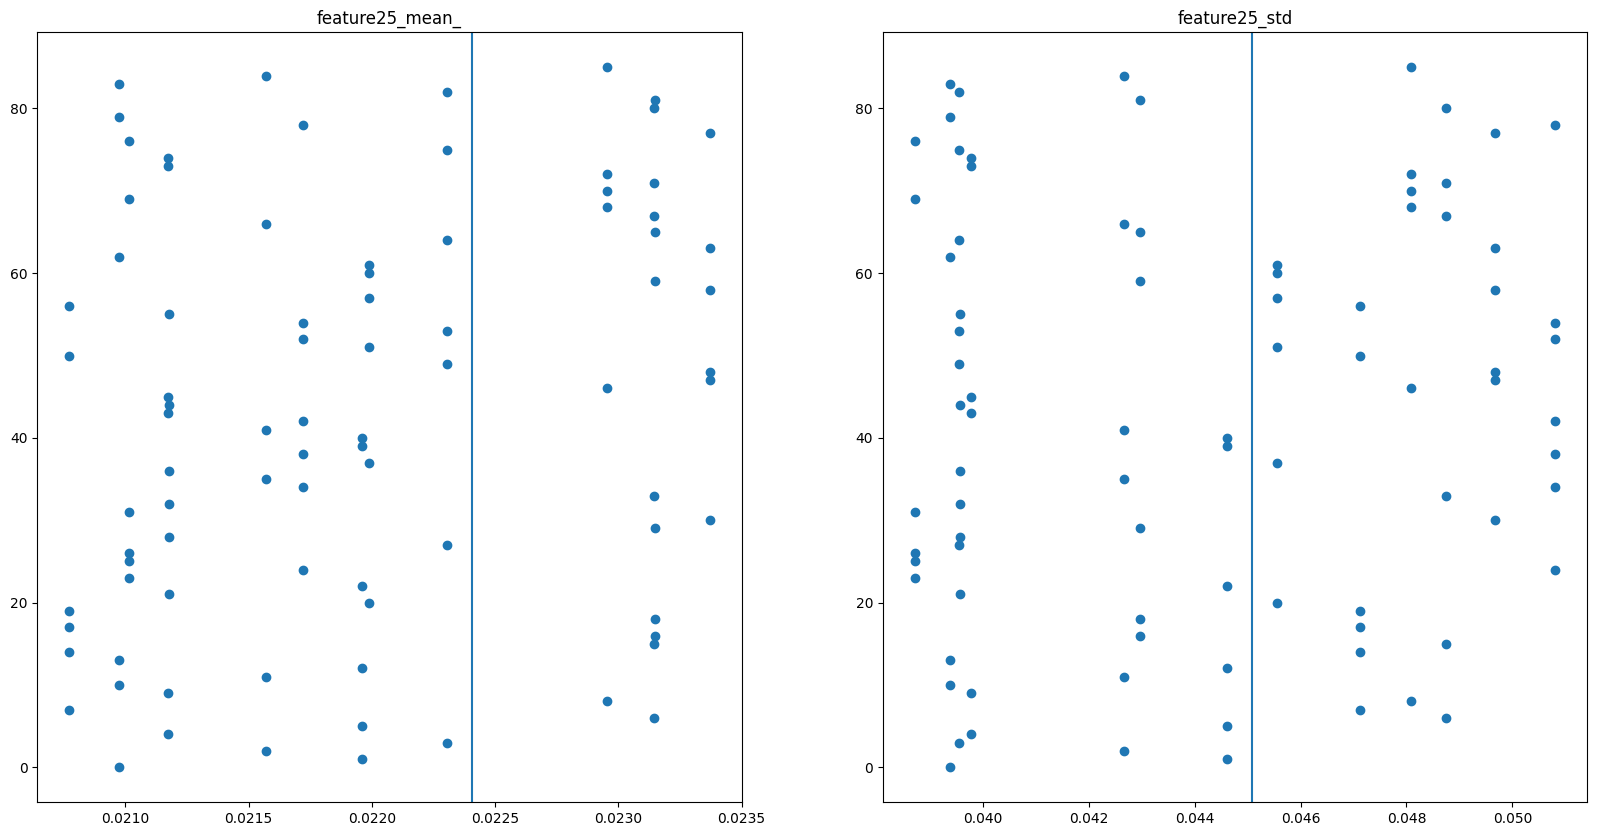

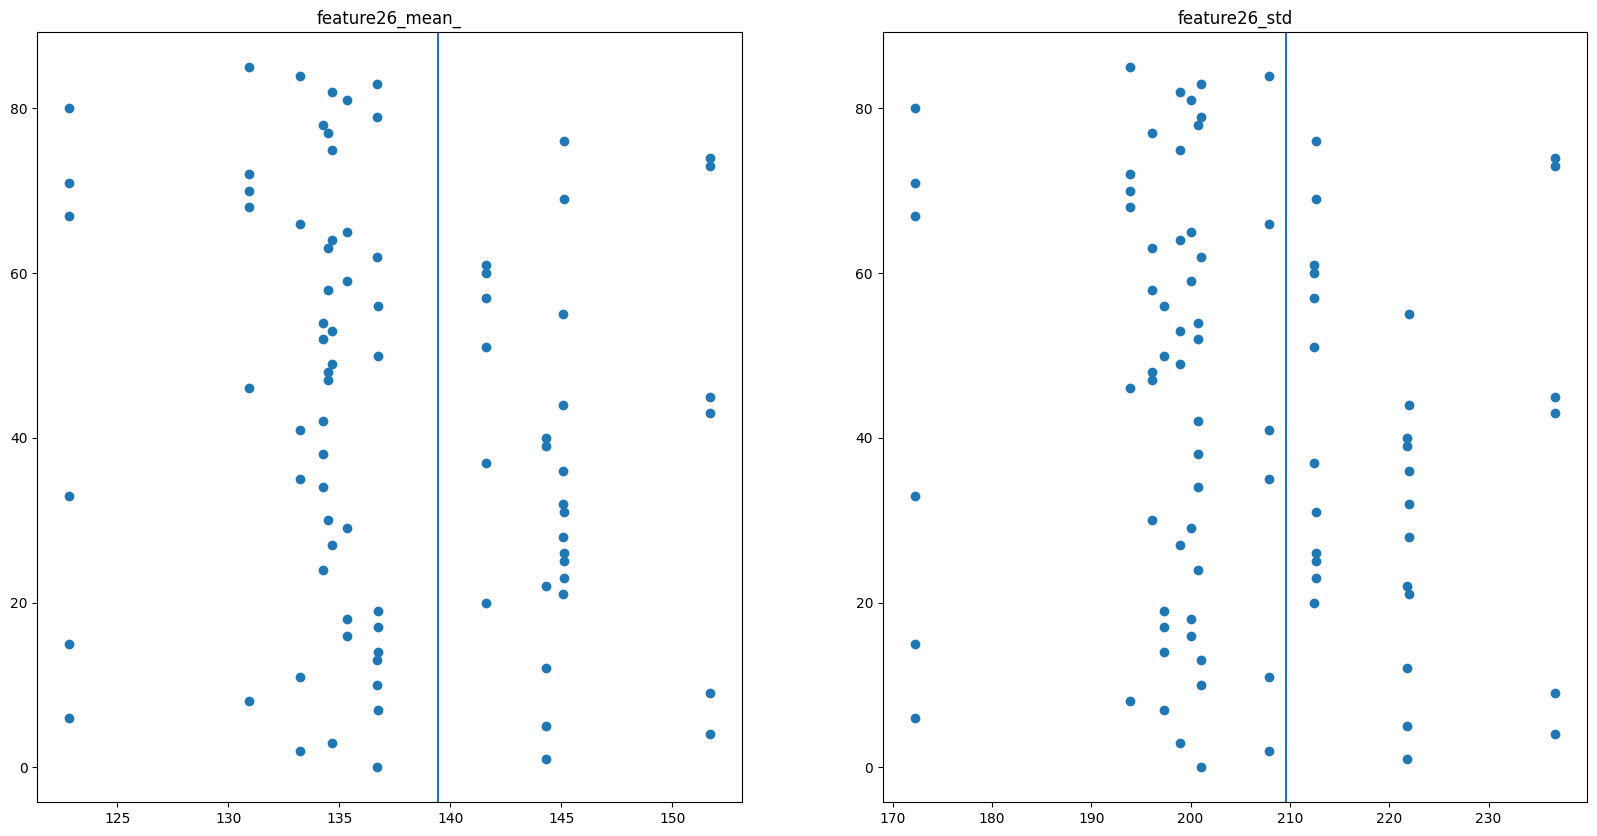

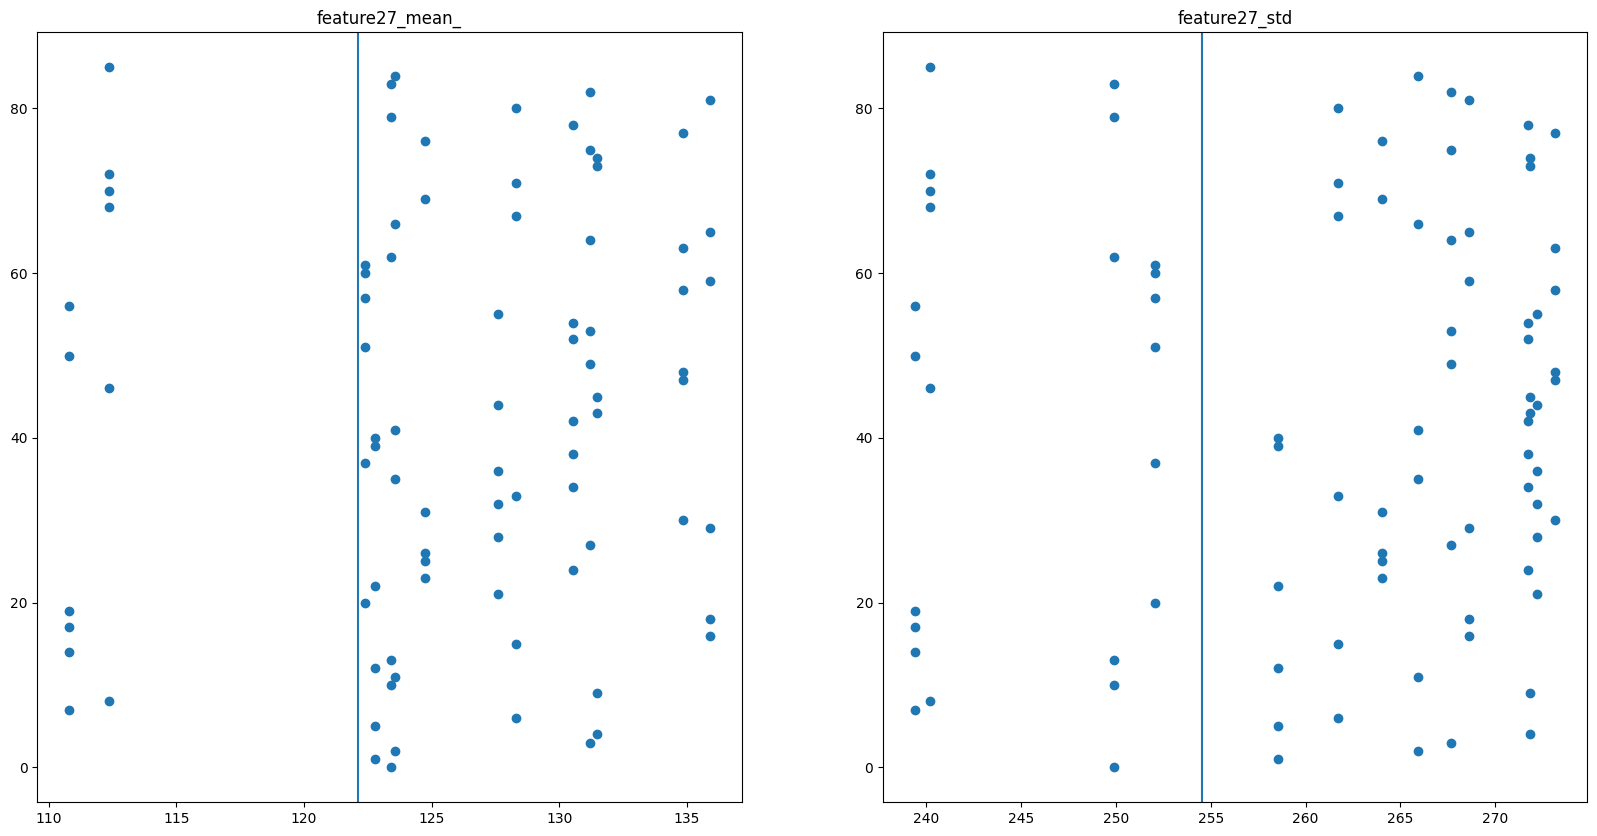

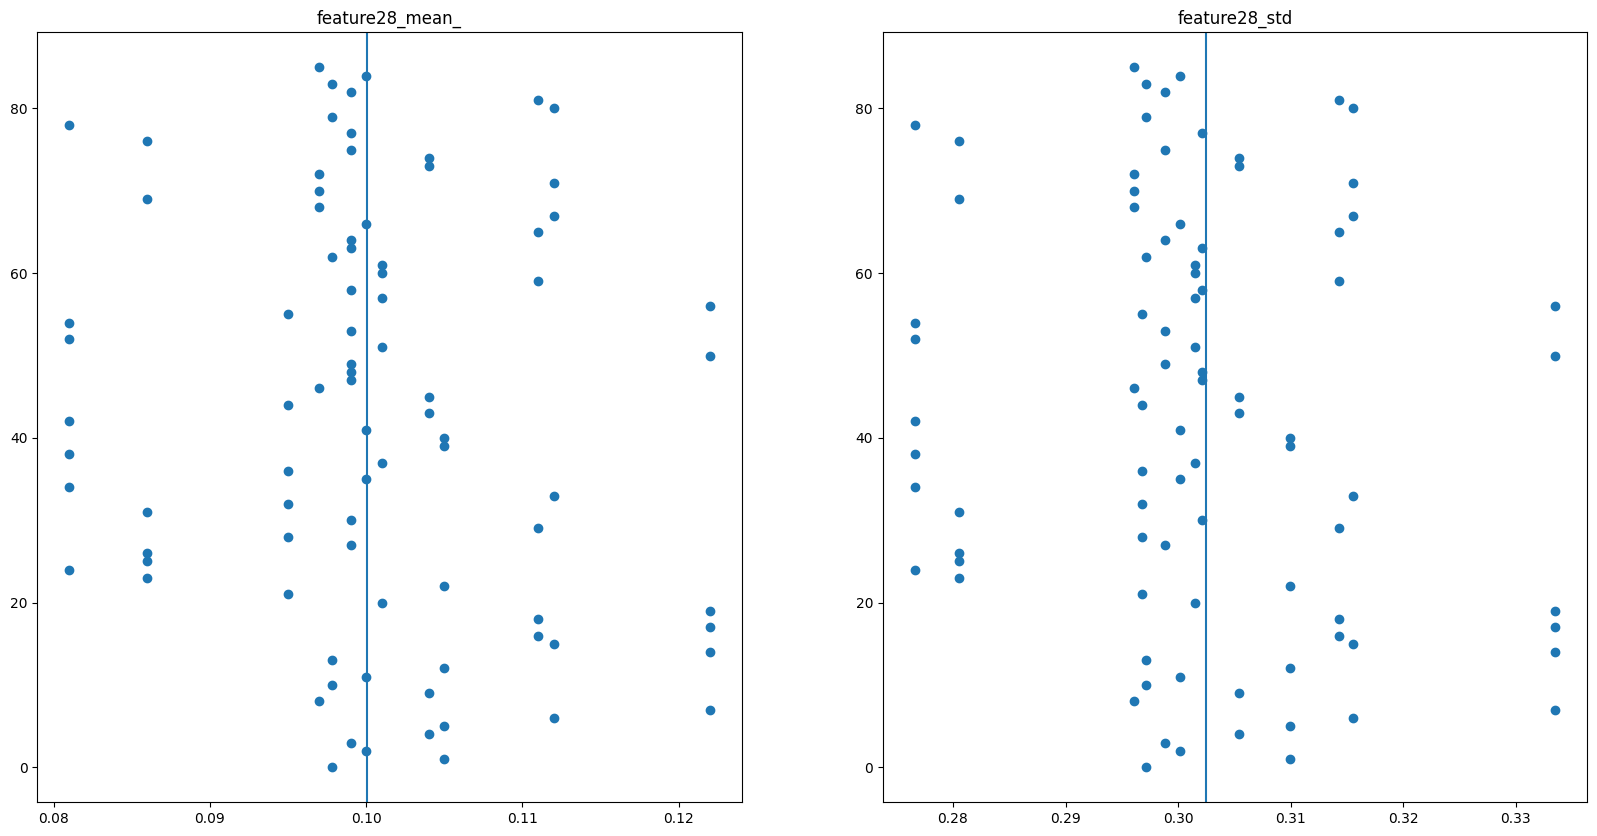

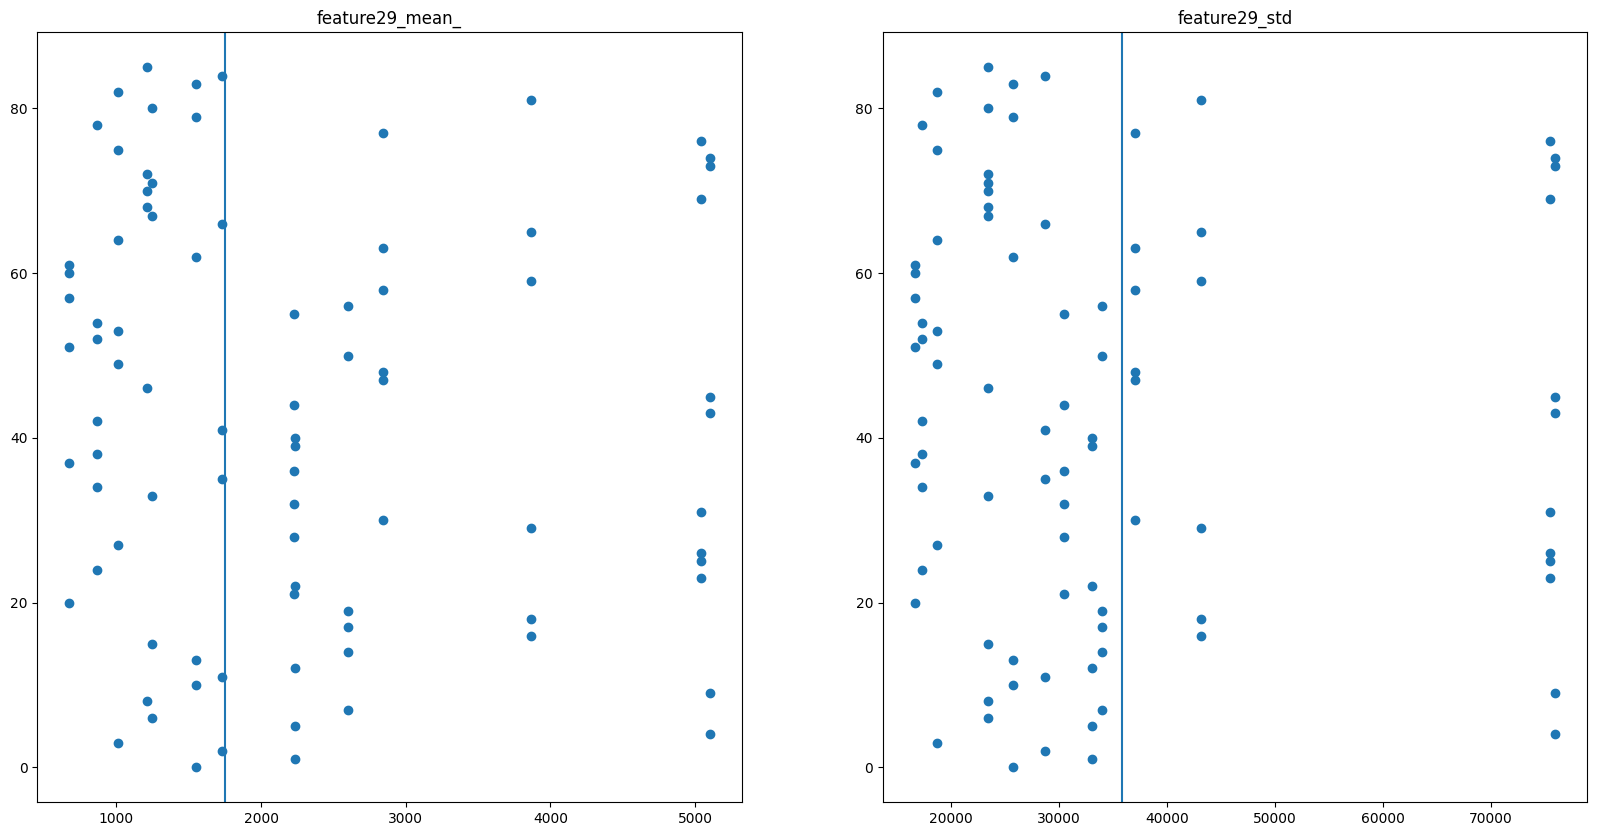

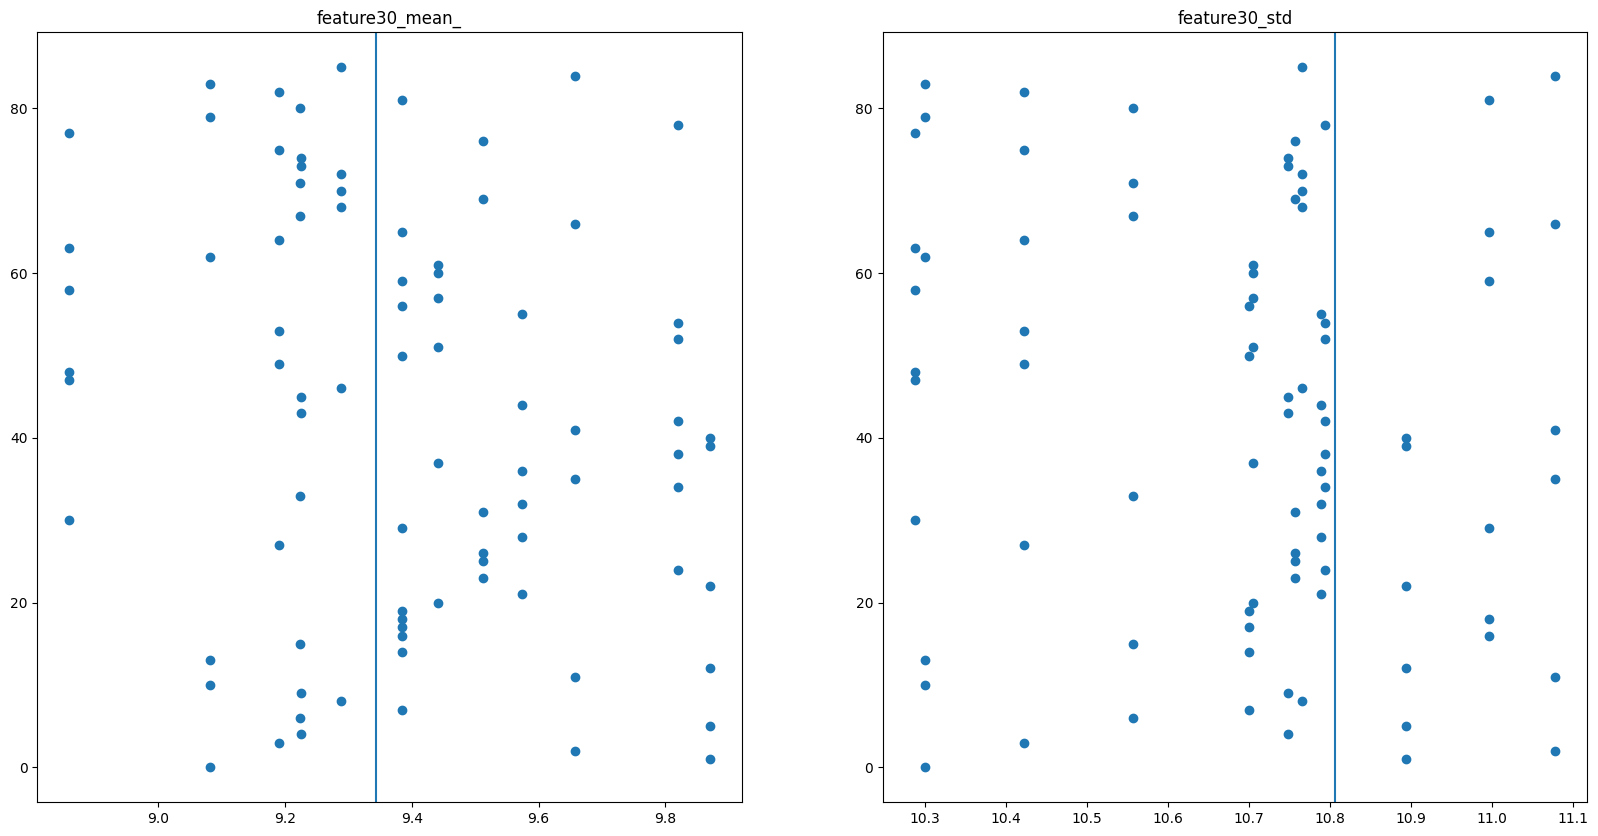

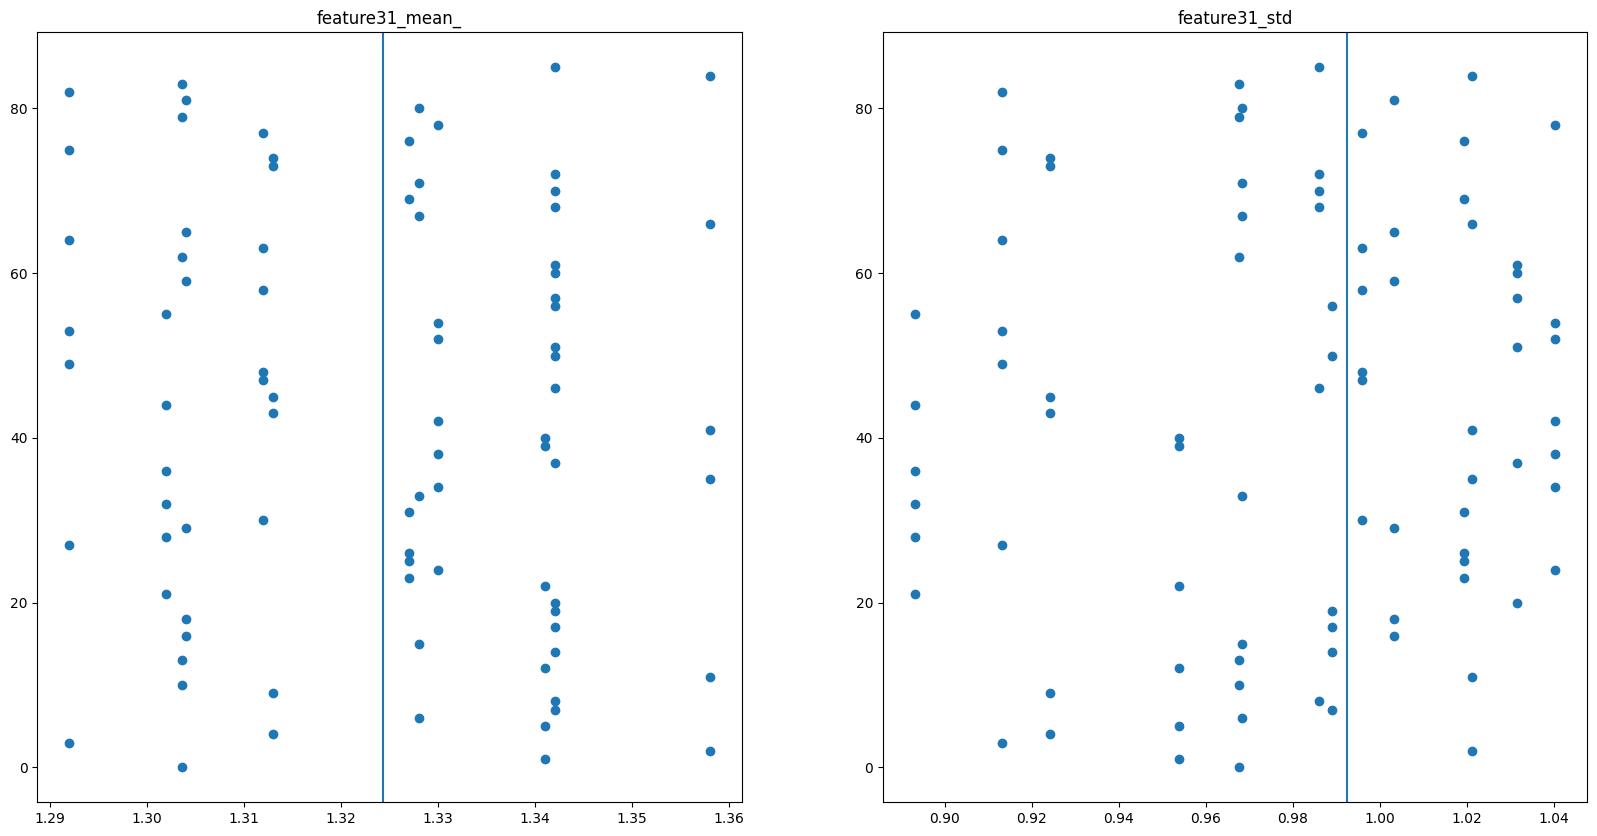

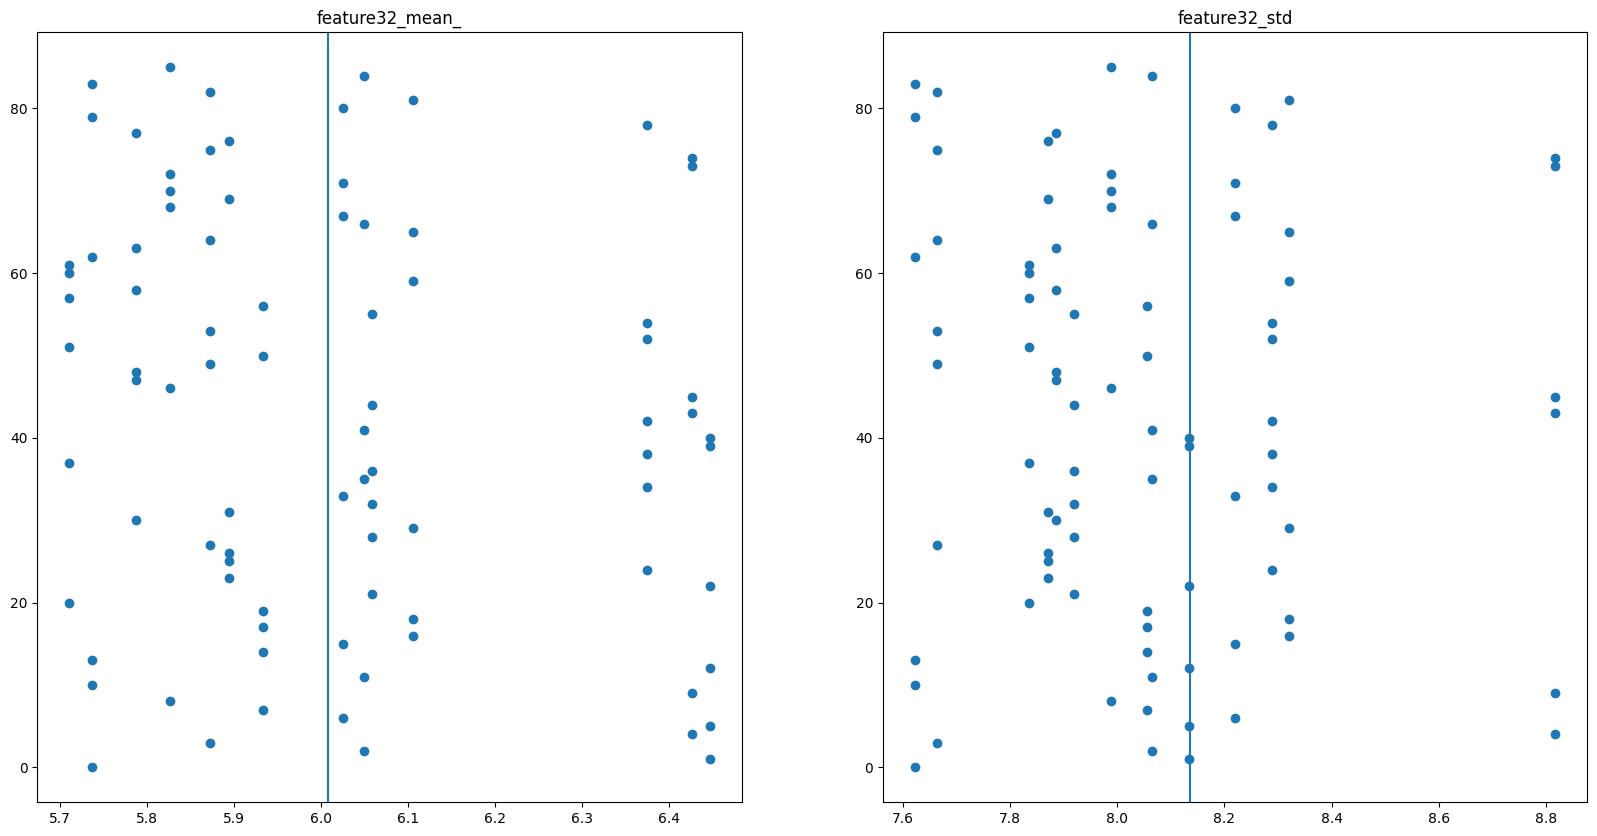

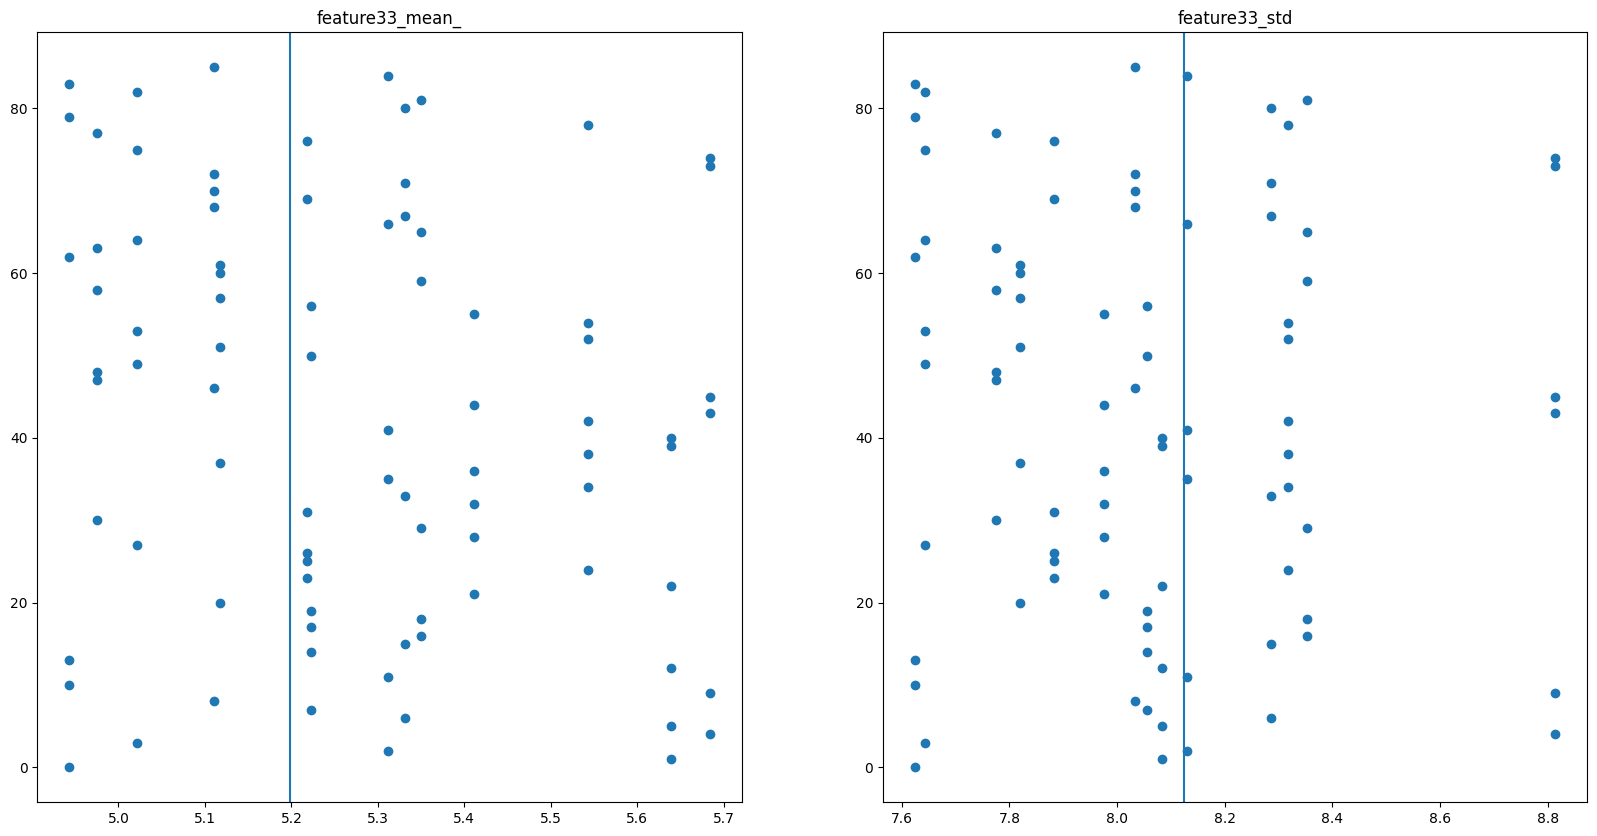

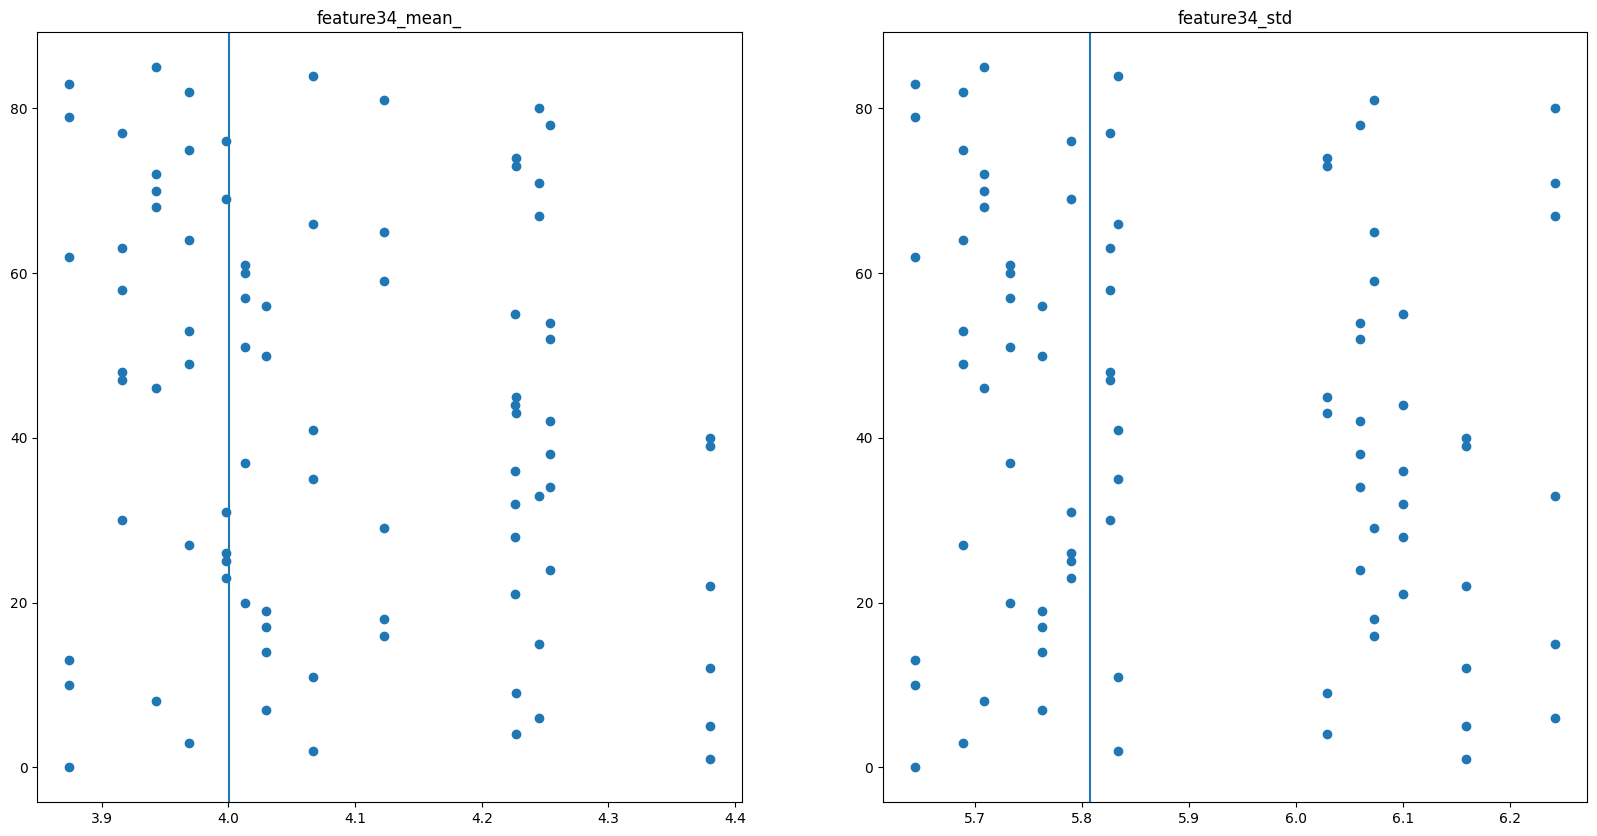

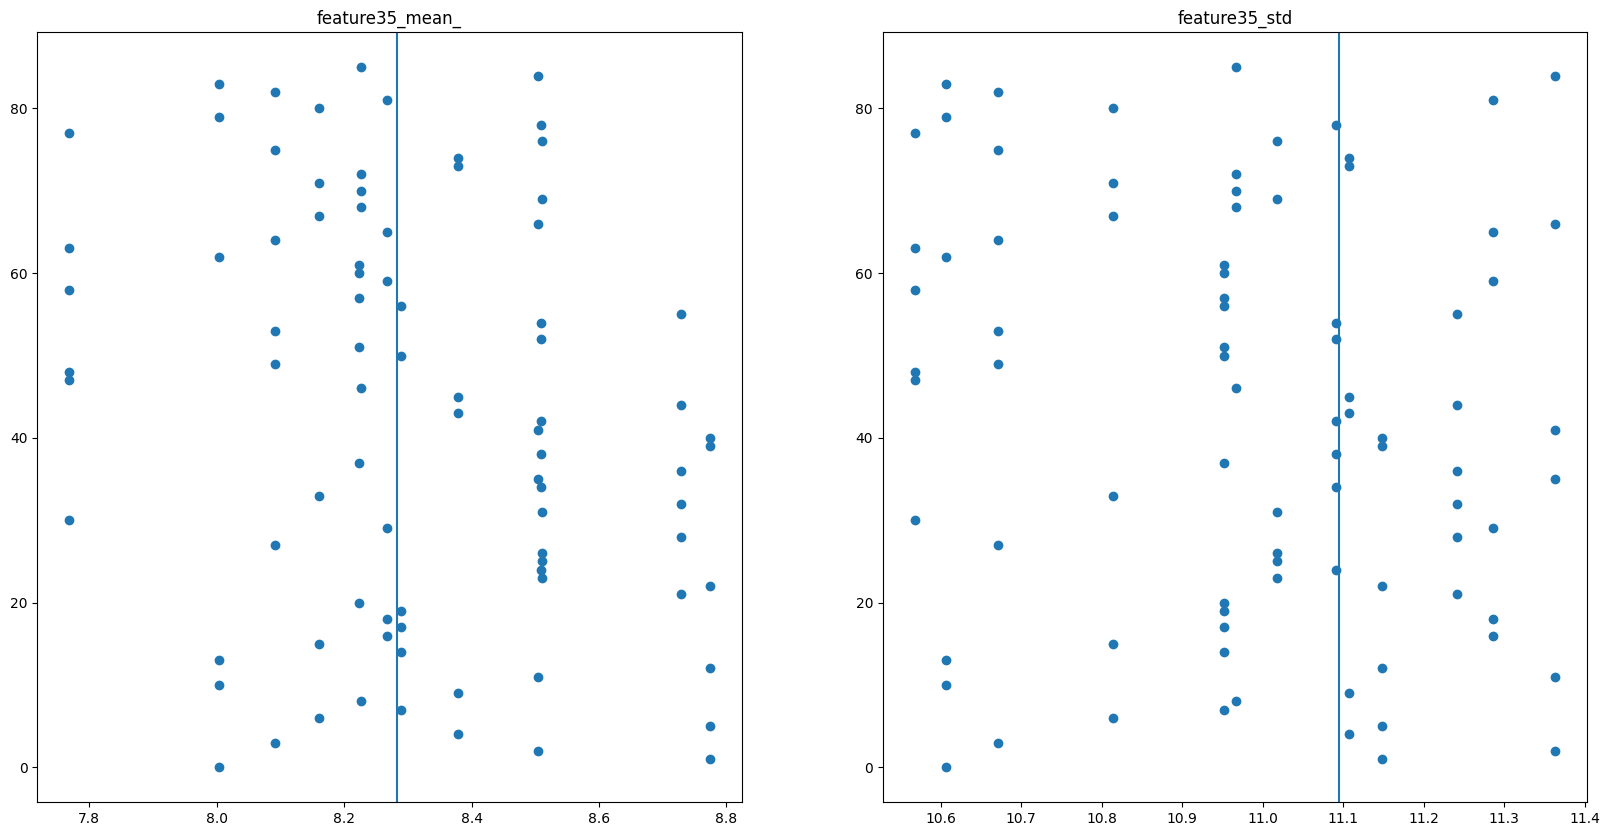

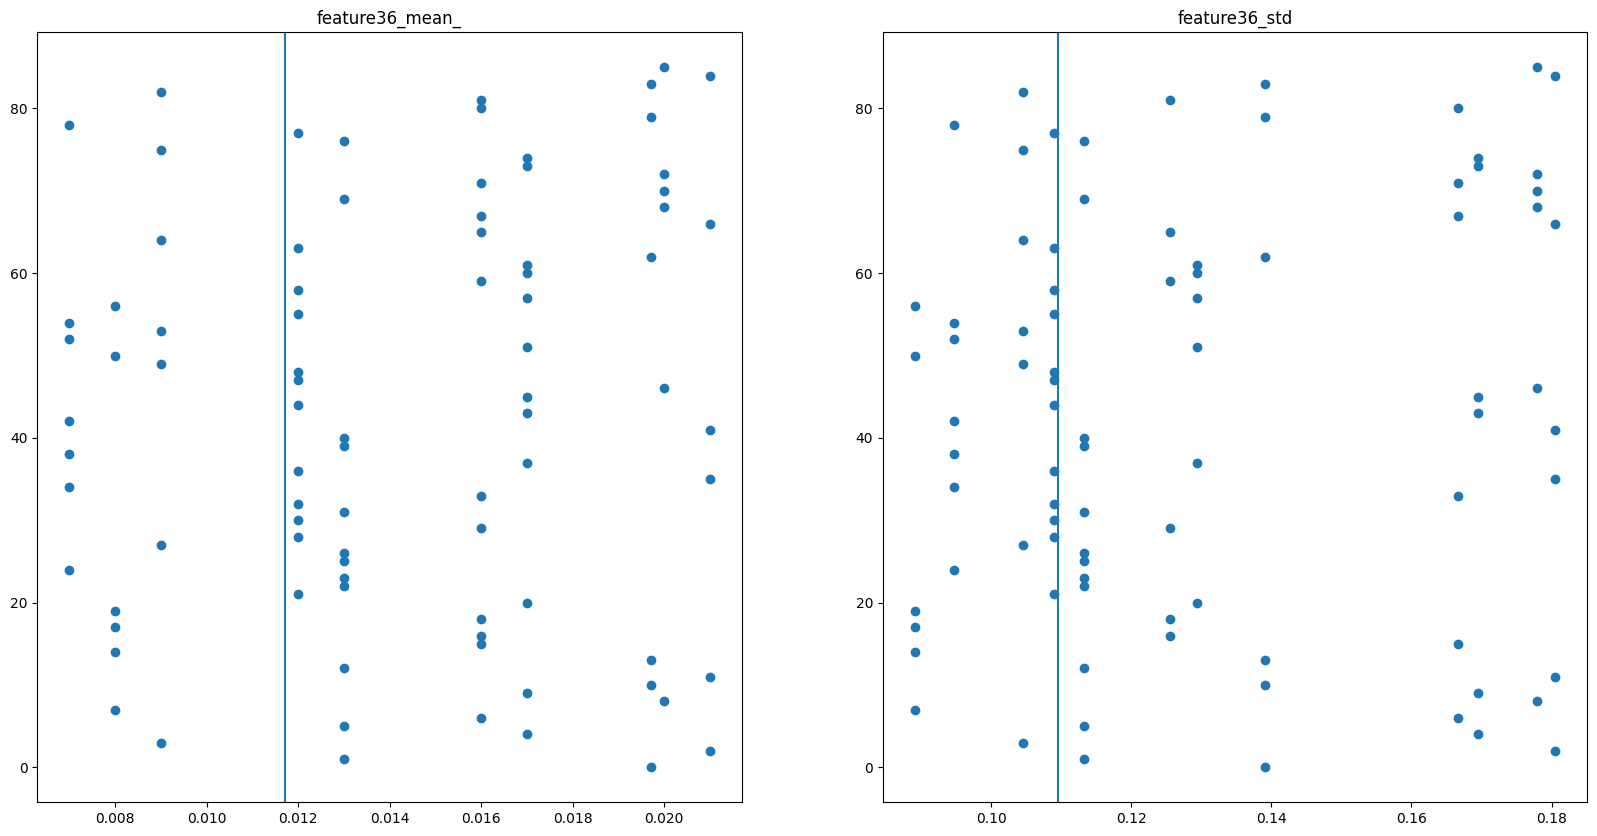

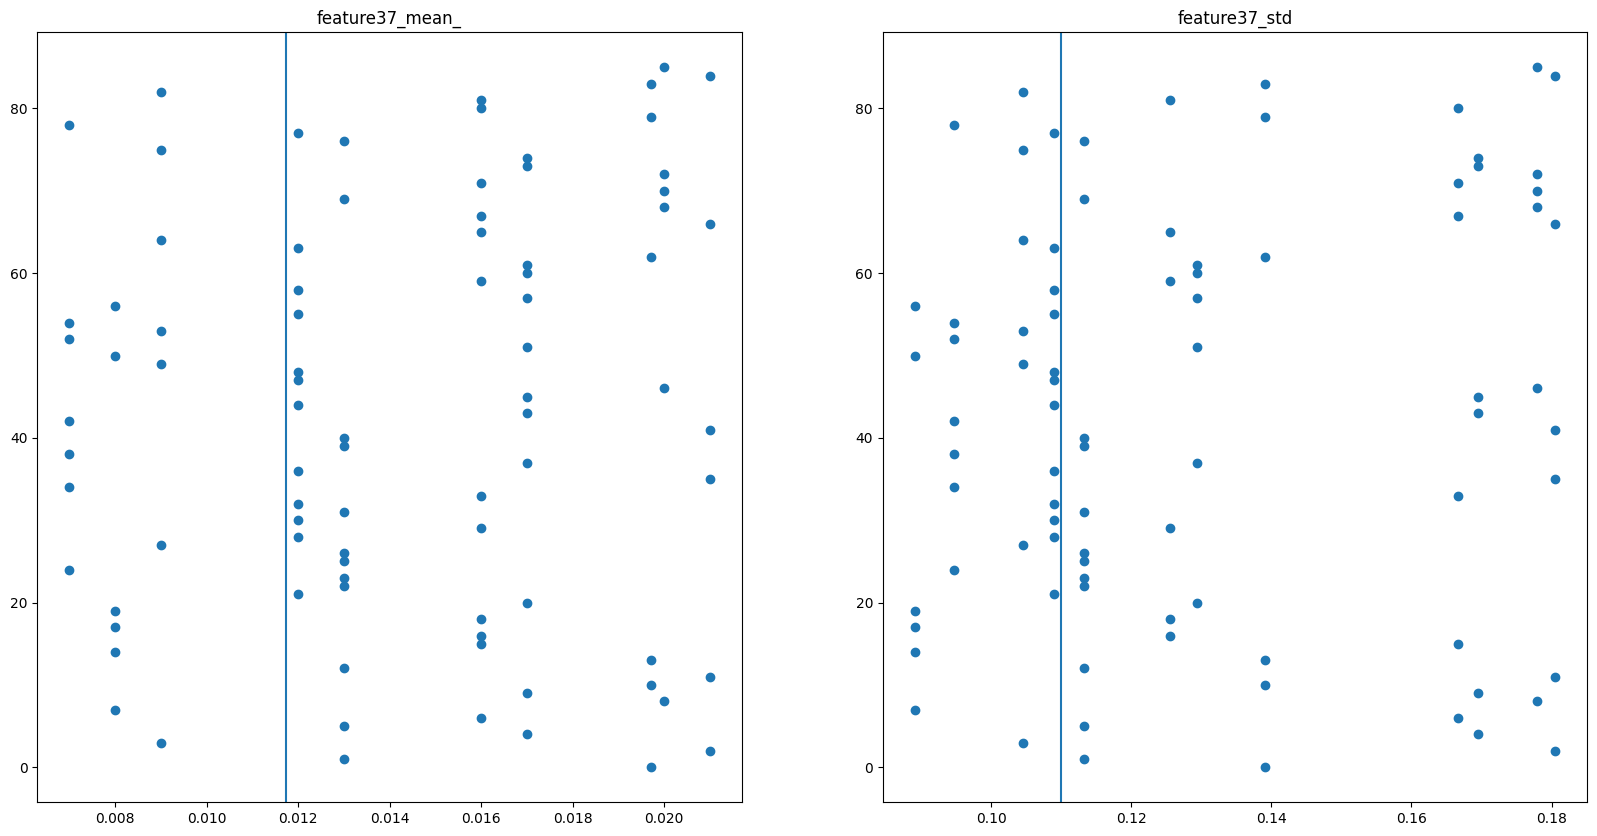

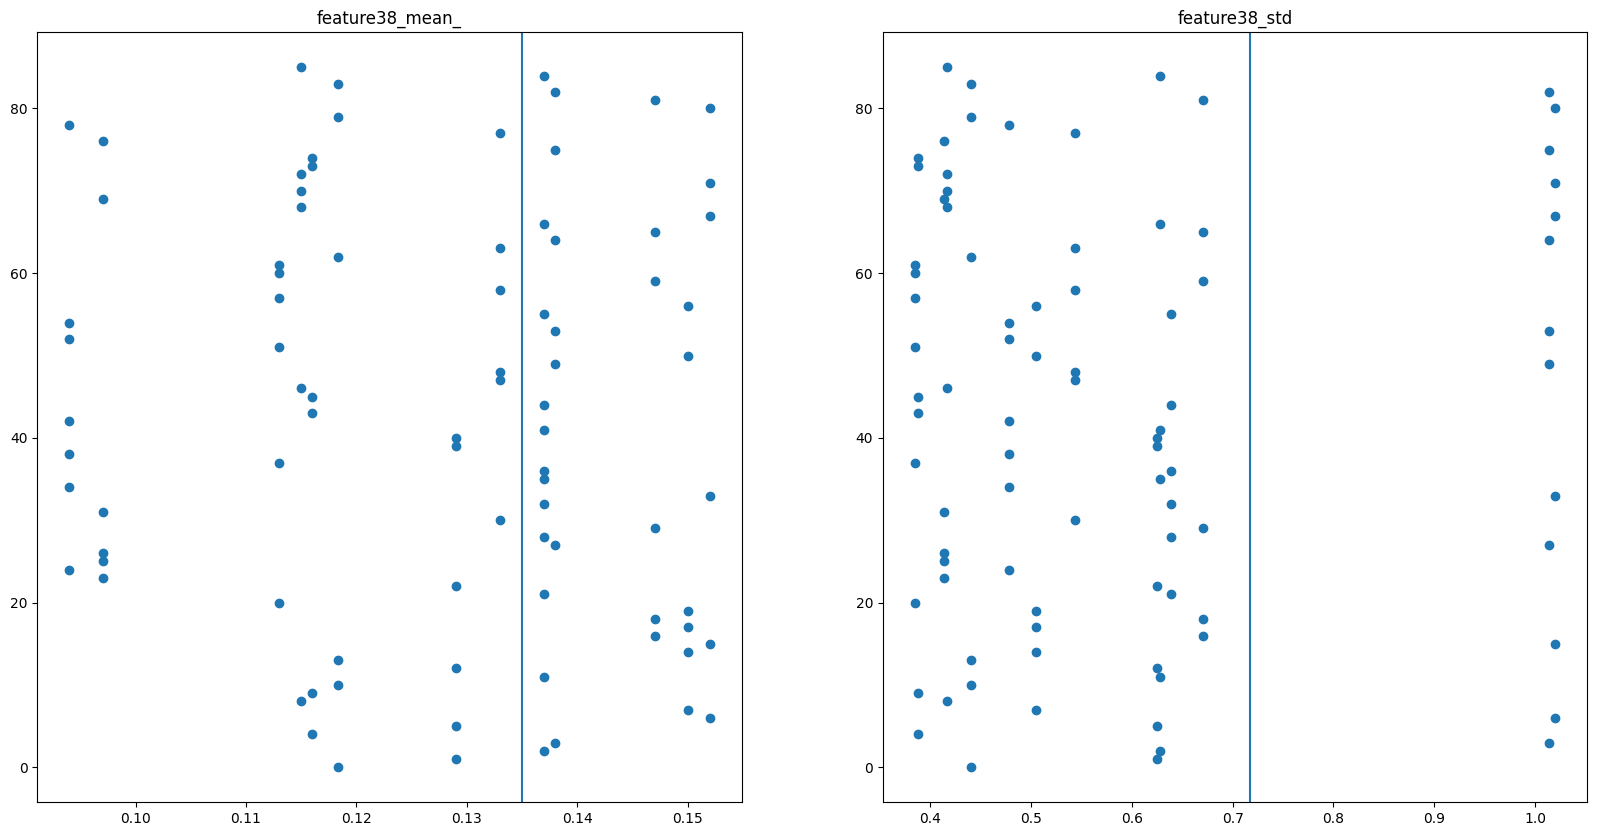

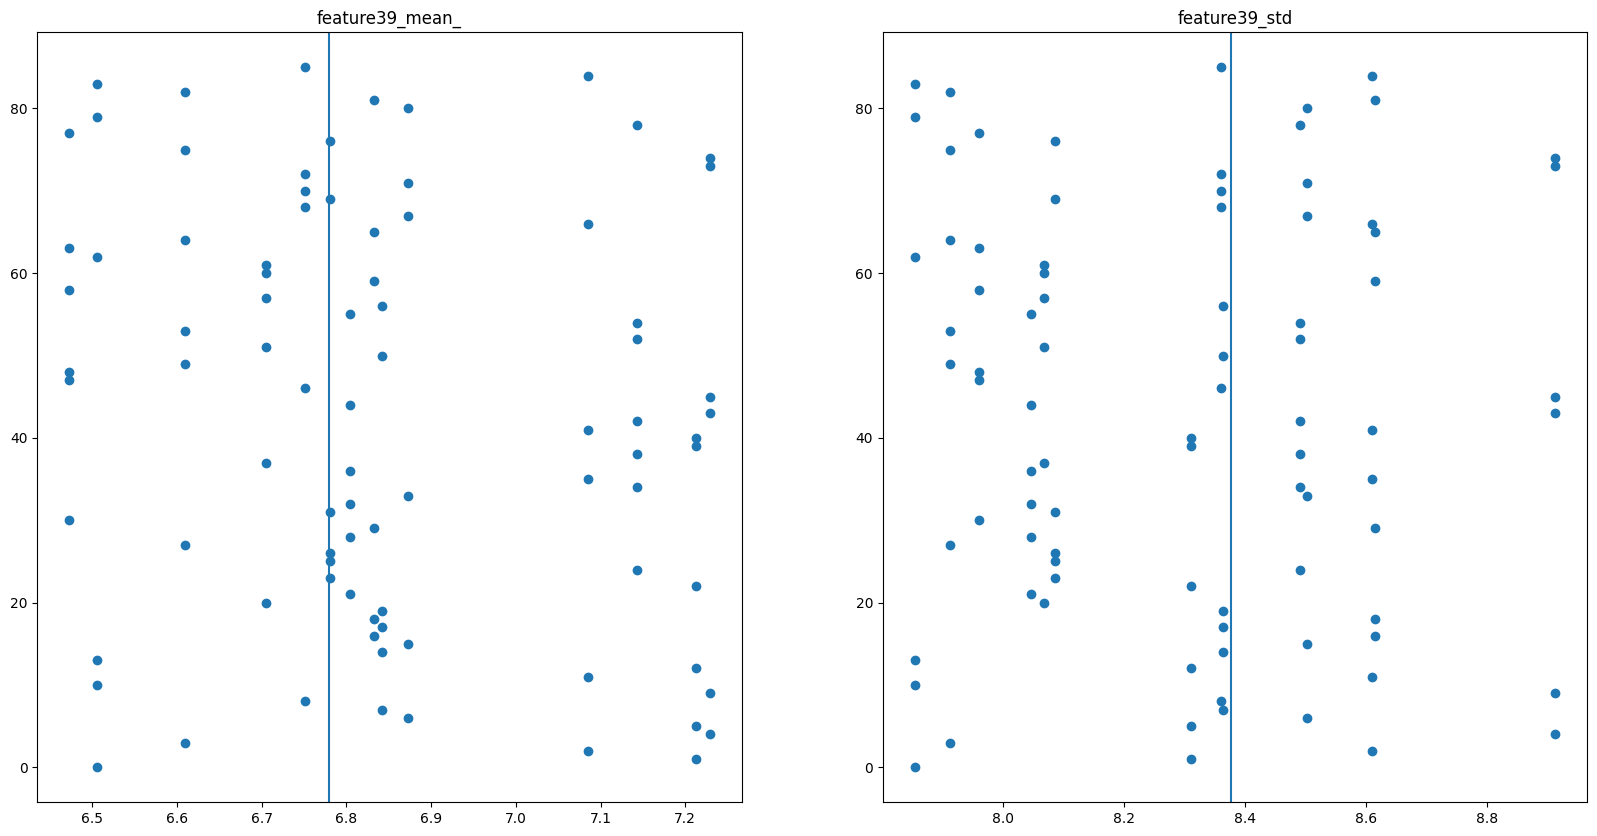

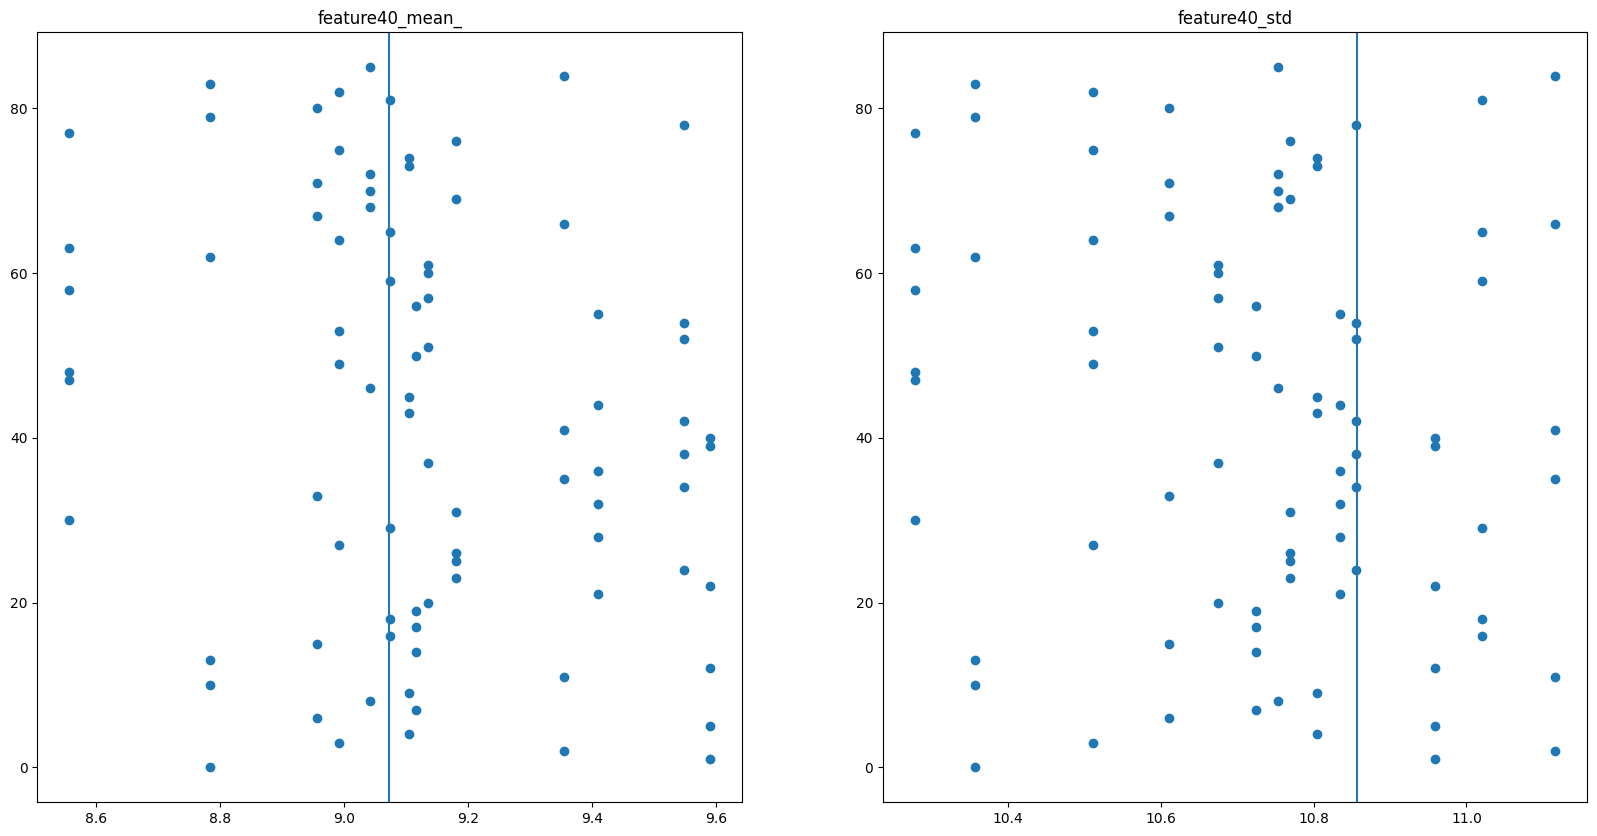

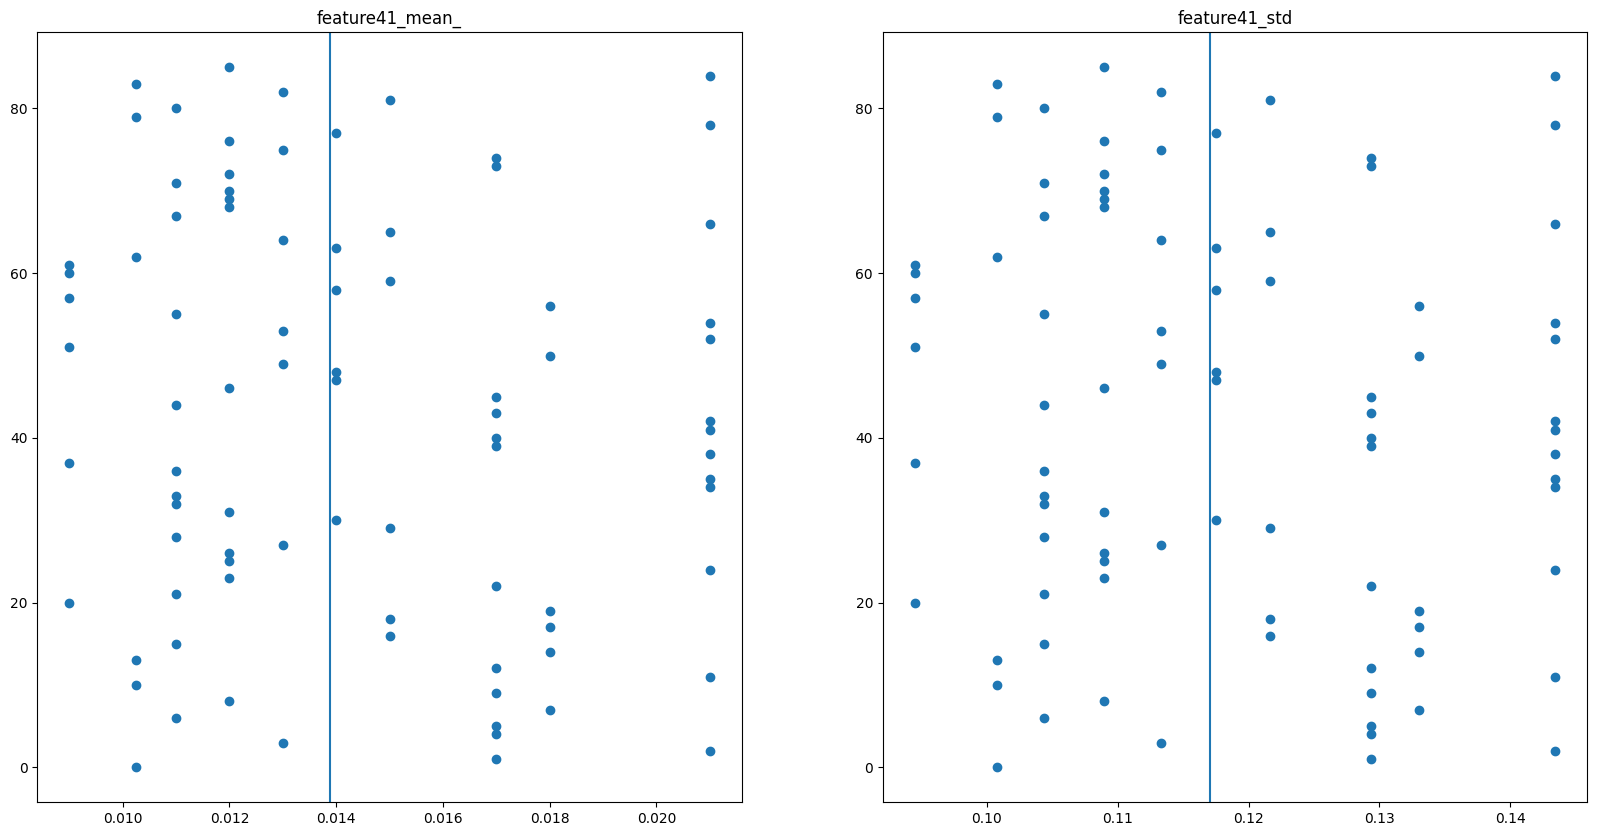

In [73]:
for col in check_drift.keys():
    stats = check_drift[col]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.scatter(x=stats['mean_'],y=stats.index)
    ax1.set_title(f'{col}_mean_')
    ax1.axvline(x=train_df[col].mean())

    ax2.scatter(x=stats['std_'],y=stats.index)
    ax2.set_title(f'{col}_std')
    ax2.axvline(x=train_df[col].std())
    plt.show()

In [34]:
from src.drift_detector import drift_psi

ModuleNotFoundError: No module named 'src.drift_detector'

In [21]:
for col in check_drift.keys():
    stats = check_drift[col]
    print(stats.n_max.sum(), stats.n_min.sum())

12 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
12 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
14 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
